## EDA CREDIT ASSIGNMENT:
### Introduction:
This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding:
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

#### When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

-  If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
-  If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

#### The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

-  **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
-  **All other cases:** All other cases when the payment is paid on time.

#### When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. **Approved:** The Company has approved loan Application

2. **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

3. **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

4. **Unused offer:**  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### Business Objectives:
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

###  Import libraries:

In [1]:
# Import important libraries and warnings:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataframe "application_data":

In [2]:
# read dataframe as df:
df = pd.read_csv("application_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
df.tail()  #fetching last 5 rows of df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 122 columns]

In [4]:
df.shape  #fetching size of total no. of rows x total no. of columns.

(307511, 122)

In [5]:
# check for variables data types:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [6]:
# fetch info of all the columns:
print(df.info("all")) #all argument is used to fetch data of all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
# as seen in dtypes cell that all variables info is not dislpayed without using "all" command. 
# use below command to show the req. no. of data.
pd.set_option("max_colwidth", 130) #to display max 130 the columns.
pd.set_option("display.max_rows", 1000) #to display max 1000 rows.

### Data Cleaning and Manipulations:
#### Null Values:

In [8]:
# Check percentage of missing values using mean function in each column:
null_columns = df.isnull().mean()
null_columns

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

#### HANDLING MISSING VALUES:
-  Delete columns having more than 40% missing values.
-  Drop unnecessary columns.
-  Drop rows where missing values are less and does not affect analysis.
-  Impute missing values with appropriate values.

In [9]:
# Deleting columns with null values mean more than 0.40.
df.drop(null_columns[null_columns > 0.40].index, axis=1, inplace=True)

In [10]:
# Check no. of columns left after removing null columns more than 40%.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Dropping unnecessary columns:

In [11]:
# Check columns having "flag" in their name:
flags = [column for column in df.columns if "FLAG" in column]
flags

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [12]:
# Only "FLAG_OWN_REALTY" variable seems relevant so we should keep only this variable and drop all the other variables from df.
flags.remove("FLAG_OWN_REALTY")
df.drop(flags, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [13]:
df.isnull().mean() #rechecking null values percentage.

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
AMT_GOODS_PRICE                0.000904
NAME_TYPE_SUITE                0.004201
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE                0.313455
CNT_FAM_MEMBERS                0.000007
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
WEEKDAY_APPR_PROCESS_START     0.000000


In [14]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True) #checking percentage of each distinct values.

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [15]:
df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True) #checking percentage of each distinct values.

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [16]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True) #checking percentage of each distinct values.

0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
6.0    0.000075
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [17]:
df.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True) #checking percentage of each distinct values.

0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
23.0    0.000004
27.0    0.000004
22.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [18]:
df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True) #checking percentage of each distinct values.

0.0      0.809863
1.0      0.127305
2.0      0.054182
3.0      0.006455
4.0      0.001790
5.0      0.000241
6.0      0.000105
8.0      0.000026
7.0      0.000026
261.0    0.000004
19.0     0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [19]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True) #checking percentage of each distinct values.

0.0     0.269937
1.0     0.238372
2.0     0.188697
3.0     0.126425
4.0     0.077875
5.0     0.045310
6.0     0.026193
7.0     0.014546
8.0     0.007996
9.0     0.004120
11.0    0.000117
12.0    0.000113
10.0    0.000083
13.0    0.000071
14.0    0.000038
17.0    0.000026
15.0    0.000023
19.0    0.000015
18.0    0.000015
16.0    0.000011
25.0    0.000004
23.0    0.000004
22.0    0.000004
21.0    0.000004
20.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [20]:
# As observed in "AMT_REQ_CREDIT_BUREAU" variables 0 has maximum percentage which is of no use for analysis.
# So we can drop these columns as well.
bureau = df.iloc[:,40:46]
df.drop(bureau, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [21]:
# There are few more columns which are of no use in this analysis. So lets drop them.
no_use = ["REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "REGION_POPULATION_RELATIVE", "WEEKDAY_APPR_PROCESS_START", 
          "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", 
          "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "OBS_30_CNT_SOCIAL_CIRCLE", "CNT_FAM_MEMBERS",
         "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE"]

In [22]:
df.drop(no_use, axis=1, inplace=True)   #Filtering of data by dropping all unnecessary columns.
df.shape                                #checking size of df after dropping all unnecessary columns.

(307511, 23)

### Imputing Missing Values:

In [23]:
df.isnull().mean() #checking for percentage of missing values.

SK_ID_CURR             0.000000
TARGET                 0.000000
NAME_CONTRACT_TYPE     0.000000
CODE_GENDER            0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
AMT_CREDIT             0.000000
AMT_ANNUITY            0.000039
AMT_GOODS_PRICE        0.000904
NAME_TYPE_SUITE        0.004201
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
DAYS_REGISTRATION      0.000000
DAYS_ID_PUBLISH        0.000000
OCCUPATION_TYPE        0.313455
ORGANIZATION_TYPE      0.000000
EXT_SOURCE_2           0.002146
EXT_SOURCE_3           0.198253
dtype: float64

In [24]:
# "OCCUPATION_TYPE" has 31% missing values so we should impute it first.
df.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [25]:
# we will include a new category "Unknown" in OCCUPATION_TYPE as we cannot impute any other category withou knowning occupation:
df.OCCUPATION_TYPE.fillna("Unknown", inplace=True) #removing Nan with "unknown".
df.OCCUPATION_TYPE.value_counts(normalize=True) #checking percentage of distinct values after imputing NaN.

Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [26]:
# Since "EXT_SOURCE_2" and "EXT_SOURCE_3" has low missing value percentage, so we can drop these rows:
df.dropna(subset=["EXT_SOURCE_2", "EXT_SOURCE_3"], inplace=True)

In [27]:
# Check value_counts:
df.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.815710
Family             0.129384
Spouse, partner    0.035705
Children           0.010370
Other_B            0.005383
Other_A            0.002600
Group of people    0.000849
Name: NAME_TYPE_SUITE, dtype: float64

In [28]:
# "Unaccompanied" has moximum values so we will impute NaN with Unaccompanied.
df.NAME_TYPE_SUITE.fillna("Unaccompanied", inplace=True)
df.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.816517
Family             0.128817
Spouse, partner    0.035548
Children           0.010324
Other_B            0.005359
Other_A            0.002588
Group of people    0.000845
Name: NAME_TYPE_SUITE, dtype: float64

In [29]:
# Impute "AMT_GOODS_PRICE" with median as it will act as typical value of goods amount and doesn't affect statistical data.
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median(), inplace=True)
df.AMT_GOODS_PRICE.isnull().sum() #rechecking no. null values.

0

In [30]:
# impute "AMT_ANNUITY" with median as it will be the typical value of annuity and does not affect statistical data.
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.median(), inplace=True) #filling NaN with median.
df.AMT_ANNUITY.isnull().sum() #rechecking no. null values.

0

### Standardizing Values & Fixing Invalid Data:

In [31]:
df.describe() #shows statistical data of df.

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  246116.000000  246116.000000  246116.000000      2.461160e+05   
mean   278192.674300       0.077659       0.424324      1.720102e+05   
std    102823.627802       0.267634       0.726722      2.567688e+05   
min    100002.000000       0.000000       0.000000      2.610000e+04   
25%    189034.500000       0.000000       0.000000      1.125000e+05   
50%    278116.500000       0.000000       0.000000      1.575000e+05   
75%    367250.250000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE     DAYS_BIRTH  \
count  2.461160e+05  246116.000000     2.461160e+05  246116.000000   
mean   6.081888e+05   27175.392142     5.466606e+05  -16130.023753   
std    4.048471e+05   14334.659107     3.713360e+05    4298.771379   
min    4.500000e+04    1615.500000     4.050000e+04  -25201.000000   
25%    2.736360e+05   16659.000000     2.385000e+05  -19720.000000   
50%    5.212800e+05   25011.000000     4.500000e+05  -15825.000000   
75%    8.140410e+05   34749.000000     6.885000e+05  -12595.000000   
max    4.050000e+06  258025.500000     4.050000e+06   -7676.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH   EXT_SOURCE_2  \
count  246116.000000      246116.000000    246116.000000  246116.000000   
mean    63545.141100       -4986.538604     -3050.984329       0.518590   
std    141151.089794        3520.075820      1489.505283       0.189052   
min    -17912.000000      -24672.000000     -7197.000000       0.000001   
25%     -2883.000000       -7480.000000     -4321.000000       0.401119   
50%     -1280.000000       -4515.000000     -3336.000000       0.570133   
75%      -307.000000       -2000.000000     -1817.000000       0.665236   
max    365243.000000           0.000000         0.000000       0.855000   

        EXT_SOURCE_3  
count  246116.000000  
mean        0.510773  
std         0.194853  
min         0.000527  
25%         0.370650  
50%         0.535276  
75%         0.669057  
max         0.896010

In [32]:
# As seen in the information of above variables: "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION" and "DAYS_ID_PUBLISH".
# These have negative values where as it should be positive so lets correct the invalid data.
df["DAYS_BIRTH"] = abs(df["DAYS_BIRTH"])
df["DAYS_EMPLOYED"] = abs(df["DAYS_EMPLOYED"])
df["DAYS_REGISTRATION"] = abs(df["DAYS_REGISTRATION"])
df["DAYS_ID_PUBLISH"] = abs(df["DAYS_ID_PUBLISH"])
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  246116.000000  246116.000000  246116.000000      2.461160e+05   
mean   278192.674300       0.077659       0.424324      1.720102e+05   
std    102823.627802       0.267634       0.726722      2.567688e+05   
min    100002.000000       0.000000       0.000000      2.610000e+04   
25%    189034.500000       0.000000       0.000000      1.125000e+05   
50%    278116.500000       0.000000       0.000000      1.575000e+05   
75%    367250.250000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE     DAYS_BIRTH  \
count  2.461160e+05  246116.000000     2.461160e+05  246116.000000   
mean   6.081888e+05   27175.392142     5.466606e+05   16130.023753   
std    4.048471e+05   14334.659107     3.713360e+05    4298.771379   
min    4.500000e+04    1615.500000     4.050000e+04    7676.000000   
25%    2.736360e+05   16659.000000     2.385000e+05   12595.000000   
50%    5.212800e+05   25011.000000     4.500000e+05   15825.000000   
75%    8.140410e+05   34749.000000     6.885000e+05   19720.000000   
max    4.050000e+06  258025.500000     4.050000e+06   25201.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH   EXT_SOURCE_2  \
count  246116.000000      246116.000000    246116.000000  246116.000000   
mean    67610.272827        4986.538604      3050.984329       0.518590   
std    139249.646138        3520.075820      1489.505283       0.189052   
min         0.000000           0.000000         0.000000       0.000001   
25%       982.000000        2000.000000      1817.000000       0.401119   
50%      2324.000000        4515.000000      3336.000000       0.570133   
75%      5941.000000        7480.000000      4321.000000       0.665236   
max    365243.000000       24672.000000      7197.000000       0.855000   

        EXT_SOURCE_3  
count  246116.000000  
mean        0.510773  
std         0.194853  
min         0.000527  
25%         0.370650  
50%         0.535276  
75%         0.669057  
max         0.896010

-  Now we have to convert these days into  into years.

In [33]:
df["AGE"] = round(df["DAYS_BIRTH"]/365, 2) #converting days to years and rounding it upto 2 values after decimal.
df.AGE

0         25.92
2         52.18
5         46.41
6         37.75
7         51.64
          ...  
307503    32.52
307505    66.81
307508    41.00
307509    32.77
307510    46.18
Name: AGE, Length: 246116, dtype: float64

In [34]:
df["YEARS_EMPLOYED"] = round(df["DAYS_EMPLOYED"]/365, 2) #converting days to years and rounding it upto 2 values after decimal.
df["YEARS_EMPLOYED"]

0            1.75
2            0.62
5            4.35
6            8.58
7            1.23
           ...   
307503       1.09
307505    1000.67
307508      21.70
307509      13.11
307510       3.46
Name: YEARS_EMPLOYED, Length: 246116, dtype: float64

In [35]:
df["YEARS_REGISTRATION"] = round(df["DAYS_REGISTRATION"]/365) #converting days to years and rounding it upto 2 values after decimal.
df["YEARS_REGISTRATION"]

0         10.0
2         12.0
5         14.0
6          3.0
7         13.0
          ... 
307503     2.0
307505    20.0
307508    18.0
307509     7.0
307510    14.0
Name: YEARS_REGISTRATION, Length: 246116, dtype: float64

In [36]:
df["YEARS_ID_PUBLISH"] = round(df["DAYS_ID_PUBLISH"]/365) #converting days to years and rounding it upto 2 values after decimal.
df["YEARS_ID_PUBLISH"]

0          6.0
2          7.0
5          1.0
6          2.0
7          7.0
          ... 
307503    11.0
307505     6.0
307508    14.0
307509     3.0
307510     1.0
Name: YEARS_ID_PUBLISH, Length: 246116, dtype: float64

In [37]:
days_columns = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]
df.drop(days_columns, axis=1, inplace=True) #dropping days columns as it is converted to years.

In [38]:
df.CODE_GENDER.value_counts(normalize=True) #checking percentage of distinct values.

F      0.664402
M      0.335582
XNA    0.000016
Name: CODE_GENDER, dtype: float64

In [39]:
# As there is XNA category in Gender column and percentage is also very low so we can drop these rows as well:
df.drop(df.loc[df.CODE_GENDER=="XNA"].index, inplace=True) #dropping rows containg Gender=XNA.
df.CODE_GENDER.value_counts(normalize=True) #rechecking value counts.

F    0.664413
M    0.335587
Name: CODE_GENDER, dtype: float64

In [40]:
df.ORGANIZATION_TYPE.value_counts(normalize=True) #checking distinct values percentage.

Business Entity Type 3    0.218108
XNA                       0.179548
Self-employed             0.116752
Other                     0.054678
Medicine                  0.038763
Business Entity Type 2    0.035996
Government                0.035549
School                    0.030600
Trade: type 7             0.024290
Kindergarten              0.023522
Construction              0.021218
Business Entity Type 1    0.019987
Transport: type 4         0.017569
Industry: type 9          0.011682
Trade: type 3             0.011344
Industry: type 3          0.010881
Security                  0.010576
Housing                   0.009800
Industry: type 11         0.009032
Military                  0.008992
Bank                      0.008553
Police                    0.008334
Transport: type 2         0.007891
Agriculture               0.007606
Security Ministries       0.007115
Postal                    0.006985
Trade: type 2             0.005871
Restaurant                0.005550
Services            

In [41]:
# As there is "XNA" category in "Organisation type" column and percentage is also low so we can drop these rows as well:
df.drop(df.loc[df.ORGANIZATION_TYPE=="XNA"].index, inplace=True) #dropping rows containg Organisation type=XNA.
df.ORGANIZATION_TYPE.value_counts(normalize=True) #rechecking value counts.

Business Entity Type 3    0.265839
Self-employed             0.142302
Other                     0.066644
Medicine                  0.047246
Business Entity Type 2    0.043873
Government                0.043328
School                    0.037296
Trade: type 7             0.029605
Kindergarten              0.028669
Construction              0.025861
Business Entity Type 1    0.024361
Transport: type 4         0.021414
Industry: type 9          0.014238
Trade: type 3             0.013827
Industry: type 3          0.013262
Security                  0.012891
Housing                   0.011945
Industry: type 11         0.011009
Military                  0.010960
Bank                      0.010425
Police                    0.010157
Transport: type 2         0.009618
Agriculture               0.009271
Security Ministries       0.008672
Postal                    0.008513
Trade: type 2             0.007156
Restaurant                0.006765
Services                  0.006002
University          

### OUTLIERS:

In [42]:
df.describe() #this will show only numerical columns.

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  201923.000000  201923.000000  201923.000000      2.019230e+05   
mean   278081.819758       0.083359       0.507258      1.791975e+05   
std    102897.502248       0.276424       0.767315      2.806630e+05   
min    100002.000000       0.000000       0.000000      2.655000e+04   
25%    188787.000000       0.000000       0.000000      1.125000e+05   
50%    277905.000000       0.000000       0.000000      1.575000e+05   
75%    367301.500000       0.000000       1.000000      2.250000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE   EXT_SOURCE_2  \
count  2.019230e+05  201923.000000     2.019230e+05  201923.000000   
mean   6.215590e+05   27887.854972     5.586218e+05       0.520526   
std    4.092170e+05   14478.435440     3.755237e+05       0.187804   
min    4.500000e+04    1980.000000     4.050000e+04       0.000001   
25%    2.844000e+05   17172.000000     2.520000e+05       0.407062   
50%    5.293485e+05   25978.500000     4.545000e+05       0.571400   
75%    8.356050e+05   35694.000000     7.065000e+05       0.665616   
max    4.050000e+06  258025.500000     4.050000e+06       0.855000   

        EXT_SOURCE_3            AGE  YEARS_EMPLOYED  YEARS_REGISTRATION  \
count  201923.000000  201923.000000   201923.000000       201923.000000   
mean        0.500285      40.781024        6.787224           12.727787   
std         0.196010       9.905468        6.557490            8.934817   
min         0.000527      21.030000        0.000000            0.000000   
25%         0.357293      32.750000        2.210000            5.000000   
50%         0.522697      40.240000        4.720000           12.000000   
75%         0.657784      48.300000        9.060000           19.000000   
max         0.893976      69.040000       49.070000           63.000000   

       YEARS_ID_PUBLISH  
count     201923.000000  
mean           7.851691  
std            4.125933  
min            0.000000  
25%            4.000000  
50%            8.000000  
75%           12.000000  
max           20.000000

-  **Plotting boxplots of numerical variables to check Outliers:**

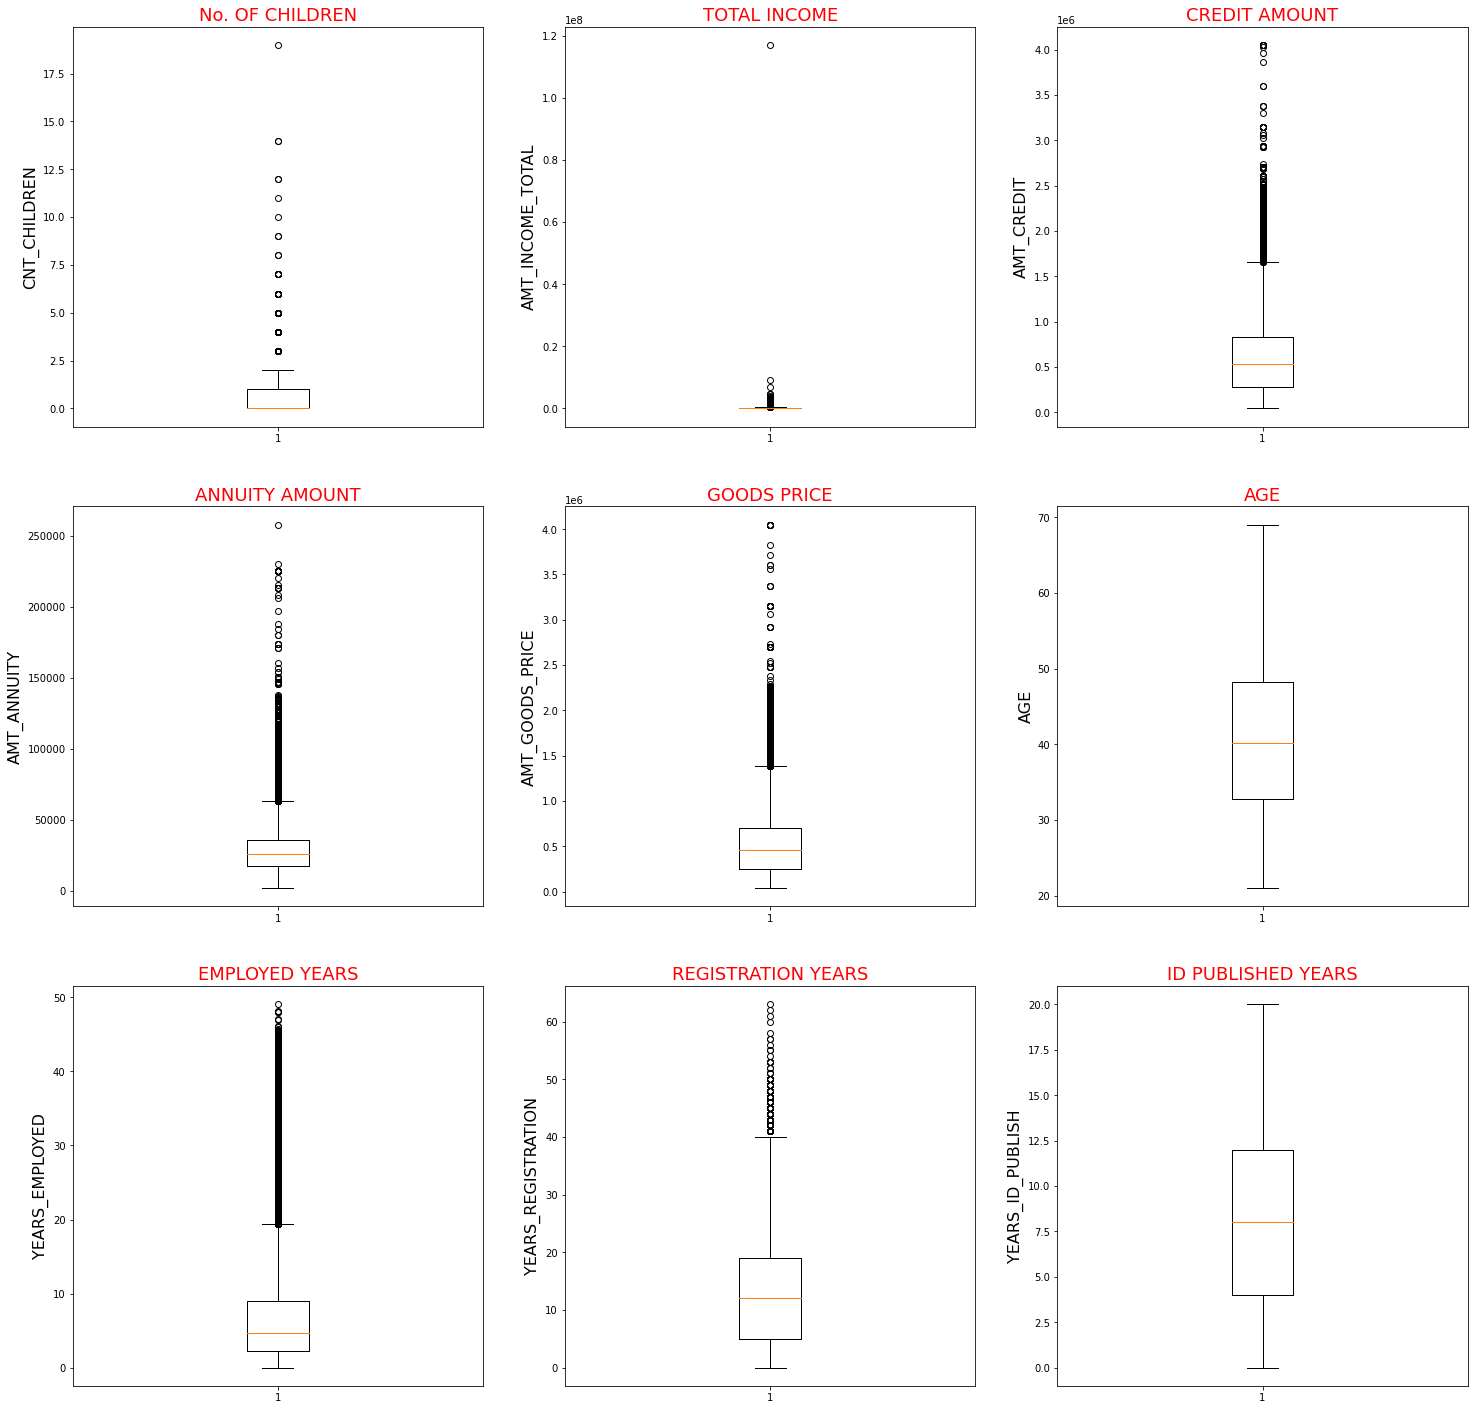

In [43]:
# Plot boxplot for numerical variables:
fig, ax = plt.subplots(3,3)

plot_1 = ax[0][0].boxplot(df.CNT_CHILDREN)
ax[0][0].set_title("No. OF CHILDREN", fontdict={"fontsize":18, "color":"Red"}) #adding title to first plot.
ax[0][0].set_ylabel("CNT_CHILDREN", fontdict={"fontsize":16}) #labelling y-axis of first plot.

plot_2 = ax[0][1].boxplot(df.AMT_INCOME_TOTAL)
ax[0][1].set_title("TOTAL INCOME", fontdict={"fontsize":18, "color":"Red"}) 
ax[0][1].set_ylabel("AMT_INCOME_TOTAL", fontdict={"fontsize":16})

plot_3 = ax[0][2].boxplot(df.AMT_CREDIT)
ax[0][2].set_title("CREDIT AMOUNT", fontdict={"fontsize":18, "color":"Red"}) 
ax[0][2].set_ylabel("AMT_CREDIT", fontdict={"fontsize":16})

plot_4 = ax[1][0].boxplot(df.AMT_ANNUITY)
ax[1][0].set_title("ANNUITY AMOUNT", fontdict={"fontsize":18, "color":"Red"}) 
ax[1][0].set_ylabel("AMT_ANNUITY", fontdict={"fontsize":16})

plot_5 = ax[1][1].boxplot(df.AMT_GOODS_PRICE)
ax[1][1].set_title("GOODS PRICE", fontdict={"fontsize":18, "color":"Red"}) 
ax[1][1].set_ylabel("AMT_GOODS_PRICE", fontdict={"fontsize":16})

plot_6 = ax[1][2].boxplot(df.AGE)
ax[1][2].set_title("AGE", fontdict={"fontsize":18, "color":"Red"})
ax[1][2].set_ylabel("AGE", fontdict={"fontsize":16})

plot_7 = ax[2][0].boxplot(df.YEARS_EMPLOYED)
ax[2][0].set_title("EMPLOYED YEARS", fontdict={"fontsize":18, "color":"Red"})
ax[2][0].set_ylabel("YEARS_EMPLOYED", fontdict={"fontsize":16})

plot_8 = ax[2][1].boxplot(df.YEARS_REGISTRATION)
ax[2][1].set_title("REGISTRATION YEARS", fontdict={"fontsize":18, "color":"Red"})
ax[2][1].set_ylabel("YEARS_REGISTRATION", fontdict={"fontsize":16})

plot_9 = ax[2][2].boxplot(df.YEARS_ID_PUBLISH)
ax[2][2].set_title("ID PUBLISHED YEARS", fontdict={"fontsize":18, "color":"Red"})
ax[2][2].set_ylabel("YEARS_ID_PUBLISH", fontdict={"fontsize":16})

fig.set_size_inches(25,25) #setting space between the graphs.

plt.show() #use to display graphs

### OUTLIERS OBSERVATIONS:

-  "CNT_CHILDREN" Variable has outliers as the value lie beyond the range of expected values which is "19". We should treat such ouliers as missing values and then can delete the outliers or can cap the outliers.
-  "AMT_INCOME_TOTAL" has only one outlier which is a relevant value which could be binned during analysis.
-  "AMT_CREDIT" has many outliers which looks relevant and could be binned for analysis.
-  "YEARS_EMPLOYED" has outliers which are relevant and can be binned for analysis.
-  "AMT_ANNUITY" has relevant outliers which can be binned during analysis.
-  "AMT_GOODS_PRICE" has outliers which can be binned for analysis.
-  "YEARS_REGISTRATION" has relevant outliers and can be binned for analysis.<br>

**This means that "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_EMPLOYED" and "YEARS_REGISTRATION"  which are numerical variables can be binned and can be converted into categorical variables.**

### BINNING OF CONTINUOUS VARIABLES:

In [44]:
# Age variable are categorised into age-groups variable:
age_labels = ["20-30", "30-40", "40-50", "50-60", "60+"] #defining labels for age group.
df["AGE_GROUP"]= pd.cut(df.AGE, bins=[20,30,40,50,60,70], labels=age_labels) #creating new categorical variable "age-group".
df.AGE_GROUP.value_counts(normalize=True) #checking percentage of distinct values of age group.

30-40    0.329254
40-50    0.302917
50-60    0.180277
20-30    0.162607
60+      0.024945
Name: AGE_GROUP, dtype: float64

In [45]:
# AMT_INCOME_TOTAL variable is categorised into INCOME-RANGE in lakhs:
income_labels= ["0-1L", "1L-2L", "2L-3L", "3L-4L", "4L-5L", "5L-6L", "6L-7L", "7L-8L", "8L-9L", "9L-10L", "10L+"] #defining labels for income range.
df["INCOME_RANGE"]= pd.cut(df.AMT_INCOME_TOTAL/100000, bins=[0,1,2,3,4,5,6,7,8,9,10,11], labels=income_labels) #creating new categorical variable "INCOME_RANGE".
df.INCOME_RANGE.value_counts(normalize=True) #checking percentage of distinct values of INCOME_RANGE.

1L-2L     0.513041
2L-3L     0.238734
0-1L      0.160965
3L-4L     0.056763
4L-5L     0.020659
5L-6L     0.004481
6L-7L     0.003370
8L-9L     0.001110
7L-8L     0.000684
9L-10L    0.000119
10L+      0.000074
Name: INCOME_RANGE, dtype: float64

In [46]:
# AMT_CREDIT variable is categorised into CREDIT_RANGE in lakhs:
credit_labels= ["0-1L", "1L-2L", "2L-3L", "3L-4L", "4L-5L", "5L-6L", "6L-7L", "7L-8L", "8L-9L", "9L-10L", "10L+"] #defining labels for CREDIT_RANGE.
df["CREDIT_RANGE"]= pd.cut(df.AMT_CREDIT/100000, bins=[0,1,2,3,4,5,6,7,8,9,10,50], labels=credit_labels) #creating new categorical variable "CREDIT_RANGE".
df.CREDIT_RANGE.value_counts(normalize=True) #checking percentage of distinct values of CREDIT_RANGE.

10L+      0.177761
2L-3L     0.164974
5L-6L     0.110790
4L-5L     0.106684
1L-2L     0.089381
3L-4L     0.086152
6L-7L     0.079981
8L-9L     0.075450
7L-8L     0.061781
9L-10L    0.030517
0-1L      0.016531
Name: CREDIT_RANGE, dtype: float64

In [47]:
# AMT_GOODS_PRICE variable is categorised into "GOODS_PRICE_RANGE" in lakhs:
goods_labels= ["0-1L", "1L-2L", "2L-3L", "3L-4L", "4L-5L", "5L-6L", "6L-7L", "7L-8L", "8L-9L", "9L-10L", "10L+"] #defining labels for "GOODS_PRICE_RANGE".
df["GOODS_PRICE_RANGE"]= pd.cut(df.AMT_GOODS_PRICE/100000, bins=[0,1,2,3,4,5,6,7,8,9,10,50], labels=goods_labels) #creating new categorical variable "GOODS_PRICE_RANGE".
df.GOODS_PRICE_RANGE.value_counts(normalize=True) #checking percentage of distinct values of "GOODS_PRICE_RANGE".

2L-3L     0.192682
4L-5L     0.190053
6L-7L     0.131263
10L+      0.120442
1L-2L     0.097557
8L-9L     0.078188
3L-4L     0.069051
5L-6L     0.041679
7L-8L     0.027857
9L-10L    0.026500
0-1L      0.024727
Name: GOODS_PRICE_RANGE, dtype: float64

In [48]:
# YEARS_EMPLOYED variable is categorised into "YEARS_EMPLOYED_RANGE" in lakhs:
years_labels= ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30+"] #defining labels for "YEARS_EMPLOYED_RANGE".
df["YEARS_EMPLOYED_RANGE"]= pd.cut(df.YEARS_EMPLOYED, bins=[0,5,10,15,20,25,30,50], labels=years_labels) #creating new categorical variable "YEARS_EMPLOYED_RANGE".
df.YEARS_EMPLOYED_RANGE.value_counts(normalize=True) #checking percentage of distinct values of "YEARS_EMPLOYED_RANGE".

0-5      0.521697
5-10     0.263134
10-15    0.114877
15-20    0.046117
20-25    0.026689
25-30    0.014575
30+      0.012911
Name: YEARS_EMPLOYED_RANGE, dtype: float64

### CHECKING IMBALANCED DATA:

In [49]:
# First we will check imbalance of data in "Target" Variable:
df.TARGET.value_counts(normalize=True)

0    0.916641
1    0.083359
Name: TARGET, dtype: float64

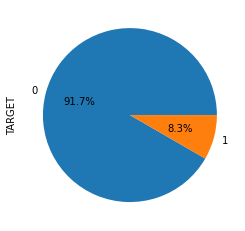

In [50]:
# Plotting imbalance of data in "Target" Variable through piechart:
df.TARGET.value_counts(normalize=True).plot.pie(autopct="%.1f%%")
plt.show()

In [51]:
# Check data imbalance in "Gender" variable:
df.CODE_GENDER.value_counts(normalize=True)

F    0.629052
M    0.370948
Name: CODE_GENDER, dtype: float64

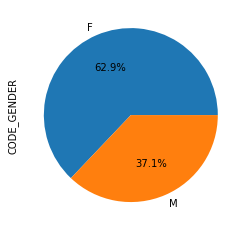

In [52]:
# Plotting data imbalance in "Gender" variable through piechart:
df.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct="%.1f%%")
plt.show()

As seen there is a huge data imbalance in "TARGET" variable.
Approx. 91.7% applicants are Non-Defaulters and 8.3% are Defaulters.<br>
**So, we will divide dataframe into two sets: df_0 & df_1 i.e Non-Defaulters & Defaulters respectively for further analysis.**

In [53]:
# Dividing data into two sets:
df_0 = df[df["TARGET"] == 0] # Non-Defaulters
df_1 = df[df["TARGET"] == 1] #Defaulters

In [54]:
df_0.head() #fetching first 5 rows of non-defaulters dataframe.

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
2       100004       0    Revolving loans           M               Y   
5       100008       0         Cash loans           M               Y   
6       100009       0         Cash loans           F               Y   
7       100010       0         Cash loans           M               Y   
10      100014       0         Cash loans           F               Y   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
2              0           67500.0    135000.0       6750.0         135000.0   
5              0           99000.0    490495.5      27517.5         454500.0   
6              1          171000.0   1560726.0      41301.0        1395000.0   
7              0          360000.0   1530000.0      42075.0        1530000.0   
10             1          112500.0    652500.0      21177.0         652500.0   

    ... EXT_SOURCE_3    AGE YEARS_EMPLOYED YEARS_REGISTRATION  \
2   ...     0.729567  52.18           0.62               12.0   
5   ...     0.621226  46.41           4.35               14.0   
6   ...     0.492060  37.75           8.58                3.0   
7   ...     0.540654  51.64           1.23               13.0   
10  ...     0.363945  27.94           1.86               12.0   

   YEARS_ID_PUBLISH AGE_GROUP INCOME_RANGE  CREDIT_RANGE  GOODS_PRICE_RANGE  \
2               7.0     50-60         0-1L         1L-2L              1L-2L   
5               1.0     40-50         0-1L         4L-5L              4L-5L   
6               2.0     30-40        1L-2L          10L+               10L+   
7               7.0     50-60        3L-4L          10L+               10L+   
10              2.0     20-30        1L-2L         6L-7L              6L-7L   

    YEARS_EMPLOYED_RANGE  
2                    0-5  
5                    0-5  
6                   5-10  
7                    0-5  
10                   0-5  

[5 rows x 28 columns]

In [55]:
df_1.head() #fetching first 5 rows of defaulters dataframe.

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0       100002       1         Cash loans           M               Y   
26      100031       1         Cash loans           F               Y   
40      100047       1         Cash loans           M               Y   
42      100049       1         Cash loans           F               N   
94      100112       1         Cash loans           M               Y   

    CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              0          202500.0    406597.5      24700.5         351000.0   
26             0          112500.0    979992.0      27076.5         702000.0   
40             0          202500.0   1193580.0      35028.0         855000.0   
42             0          135000.0    288873.0      16258.5         238500.0   
94             0          315000.0    953460.0      64107.0         900000.0   

    ... EXT_SOURCE_3    AGE YEARS_EMPLOYED YEARS_REGISTRATION  \
0   ...     0.139376  25.92           1.75               10.0   
26  ...     0.190706  51.30           7.20               18.0   
40  ...     0.320163  47.90           3.46                3.0   
42  ...     0.399676  36.67           9.85                0.0   
94  ...     0.077499  27.94           5.52               13.0   

   YEARS_ID_PUBLISH AGE_GROUP INCOME_RANGE  CREDIT_RANGE  GOODS_PRICE_RANGE  \
0               6.0     20-30        2L-3L         4L-5L              3L-4L   
26              5.0     50-60        1L-2L        9L-10L              7L-8L   
40              3.0     40-50        2L-3L          10L+              8L-9L   
42             12.0     30-40        1L-2L         2L-3L              2L-3L   
94              3.0     20-30        3L-4L        9L-10L              8L-9L   

    YEARS_EMPLOYED_RANGE  
0                    0-5  
26                  5-10  
40                   0-5  
42                  5-10  
94                  5-10  

[5 rows x 28 columns]

### UNIVARIATE ANALYSIS:

#### NUMERICAL VARIABLE:

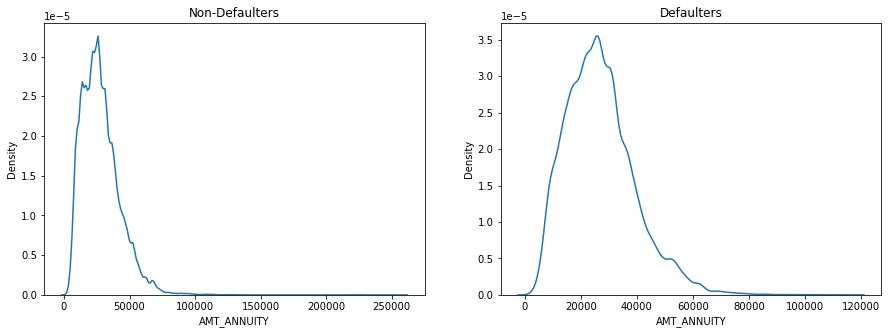

In [56]:
# Plotting distplot for "AMT_ANNUITY" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(df_0.AMT_ANNUITY, bins=20, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(df_1.AMT_ANNUITY, bins=20, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

-  ANNUITY amount is less distributed in defaulters compared to non-defaulters which extends to higher amount.

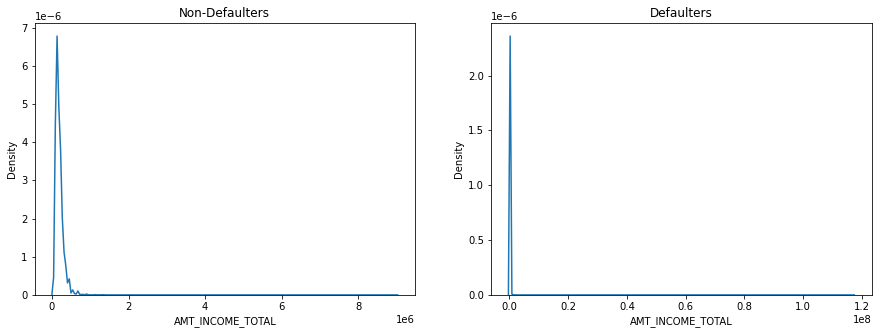

In [57]:
# Plotting distplot for "AMT_INCOME_TOTAL" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(df_0.AMT_INCOME_TOTAL, bins=8, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(df_1.AMT_INCOME_TOTAL, bins=8, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

-  People between 1-2 lakhs income avails maximum loans.

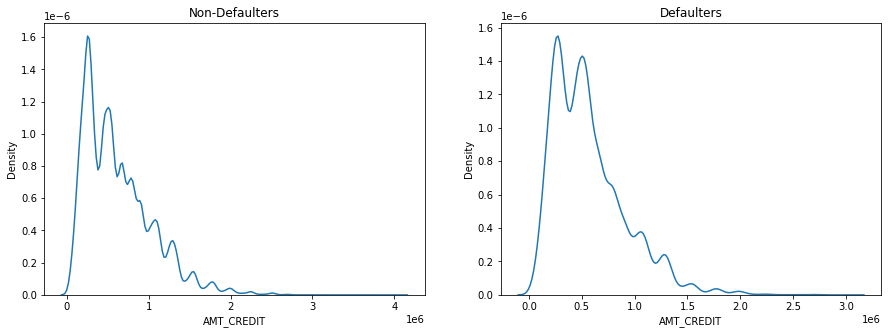

In [58]:
# Plotting distplot for "AMT_CREDIT" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(df_0.AMT_CREDIT, bins=5, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(df_1.AMT_CREDIT, bins=5, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Defaulters are observed more in lower credit amount region.

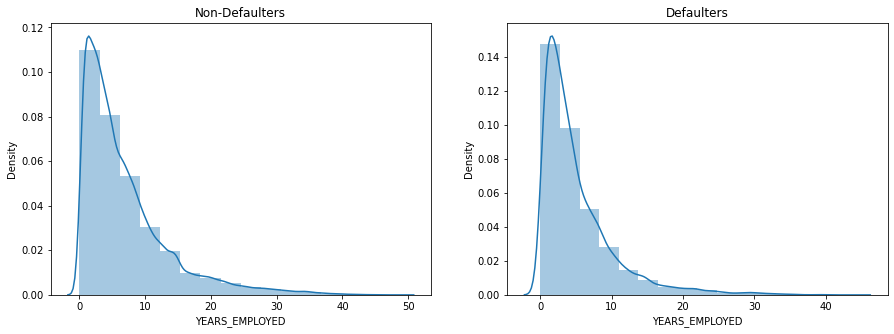

In [59]:
# Plotting distplot for "YEARS_EMPLOYED" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(df_0.YEARS_EMPLOYED, bins=16, kde=True, ax=ax[0], hist=True).set_title("Non-Defaulters")
sns.distplot(df_1.YEARS_EMPLOYED, bins=16, kde=True, ax=ax[1], hist=True).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Defaulters are employed for less than 3 years and non-defaulters are employed for more than 3 years.

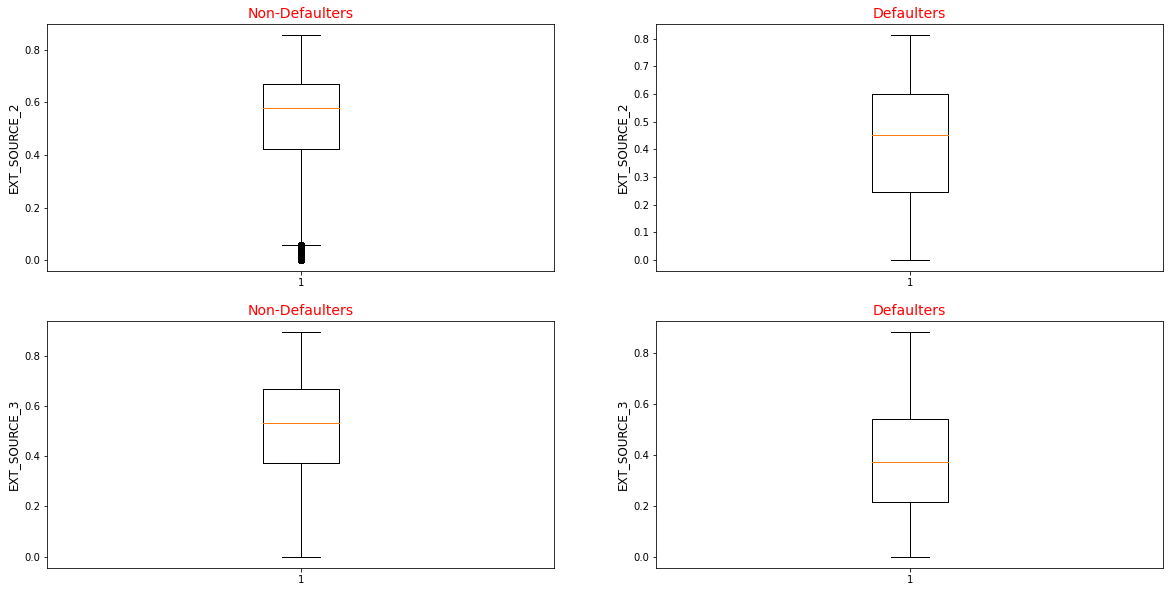

In [60]:
# Plotting boxplot for "EXT_SOURCE_2" and "EXT_SOURCE_3" for defaulters and non-defaulters:
fig, ax = plt.subplots(2,2)
ax[0][0].boxplot(df_0.EXT_SOURCE_2)
ax[0][0].set_title("Non-Defaulters", fontdict={"fontsize":14, "color":"Red"})
ax[0][0].set_ylabel("EXT_SOURCE_2", fontdict={"fontsize":12})

ax[1][0].boxplot(df_0.EXT_SOURCE_3)
ax[1][0].set_title("Non-Defaulters", fontdict={"fontsize":14, "color":"Red"})
ax[1][0].set_ylabel("EXT_SOURCE_3", fontdict={"fontsize":12})

ax[0][1].boxplot(df_1.EXT_SOURCE_2)
ax[0][1].set_title("Defaulters", fontdict={"fontsize":14, "color":"Red"})
ax[0][1].set_ylabel("EXT_SOURCE_2", fontdict={"fontsize":12})

ax[1][1].boxplot(df_1.EXT_SOURCE_3)
ax[1][1].set_title("Defaulters", fontdict={"fontsize":14, "color":"Red"})
ax[1][1].set_ylabel("EXT_SOURCE_3", fontdict={"fontsize":12})

fig.set_size_inches(20,10)

plt.show()

- Defaulters have mean score of payment less than non-defaulters in EXT_SOURCE_2  and EXT_SOURCE_3.

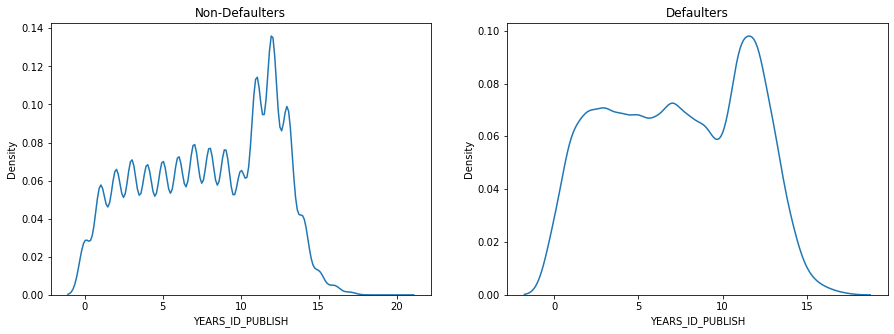

In [61]:
# Plotting histplot for "YEARS_ID_PUBLISH" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(df_0.YEARS_ID_PUBLISH, bins=15, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(df_1.YEARS_ID_PUBLISH, bins=15, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Defaulters have consistence density in changing identity documents as compared to non-defaulters.

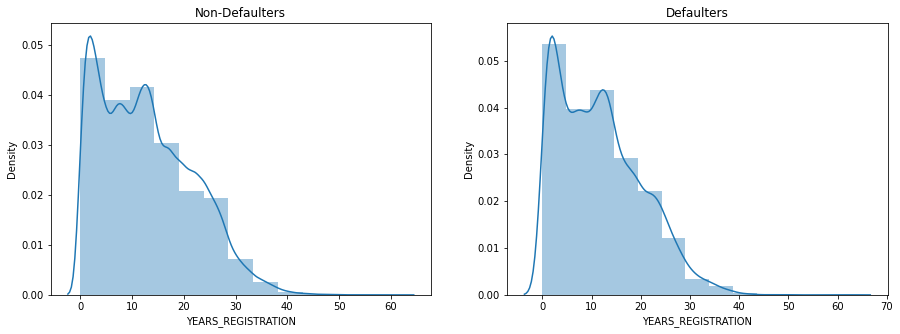

In [62]:
# Plotting distplot for "YEARS_REGISTRATION" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(df_0.YEARS_REGISTRATION, bins=13, kde=True, ax=ax[0], hist=True).set_title("Non-Defaulters")
sns.distplot(df_1.YEARS_REGISTRATION, bins=13, kde=True, ax=ax[1], hist=True).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Peak is between 0-10 years of registration and lowest at 30-40 years of registration.

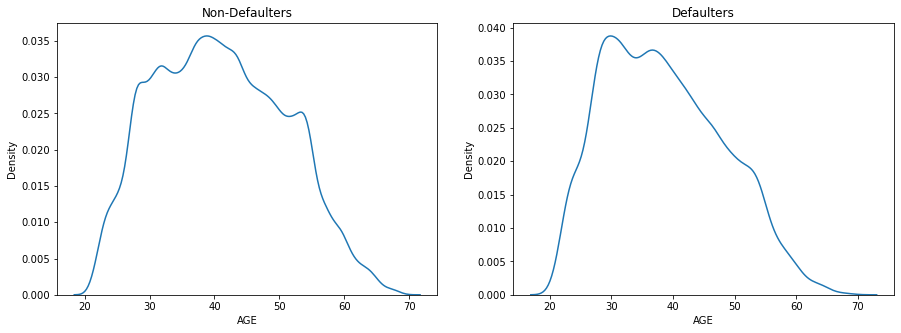

In [63]:
# Plotting distplot for "AGE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(df_0.AGE, bins=10, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(df_1.AGE, bins=10, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- People between 30 years to 50 years of age are getting more loan than above 60 years age .

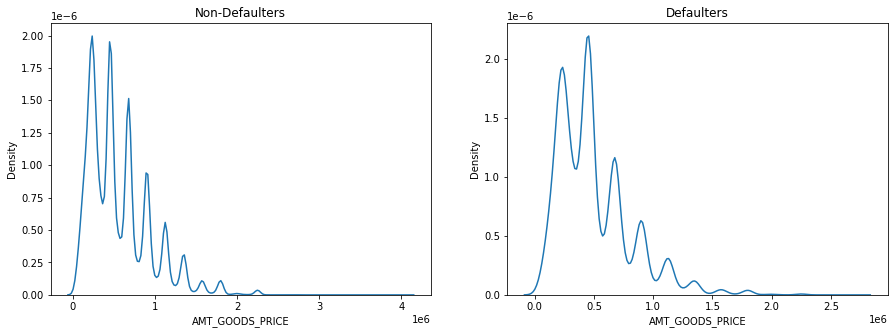

In [64]:
# Plotting distplot for "AMT_GOODS_PRICE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(df_0.AMT_GOODS_PRICE, bins=15, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(df_1.AMT_GOODS_PRICE, bins=15, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Peak is at goods price amount below 1 lakh and lowest above 2 lakhs.

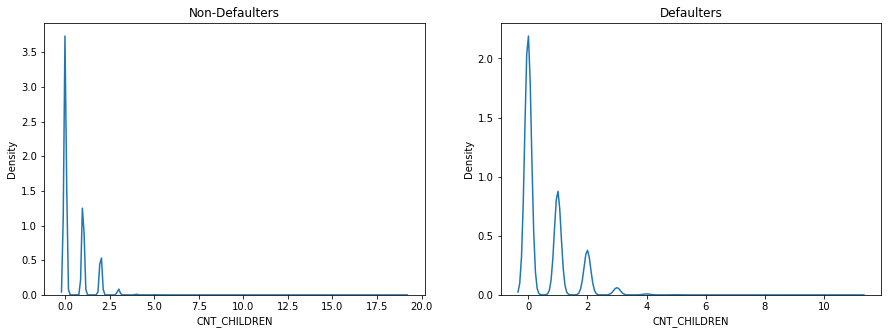

In [65]:
# Plotting distplot for "CNT_CHILDREN" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(df_0.CNT_CHILDREN, bins=20, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(df_1.CNT_CHILDREN, bins=20, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

-  count of children is from 0 to 4.

#### CATEGORICAL VARIABLE:

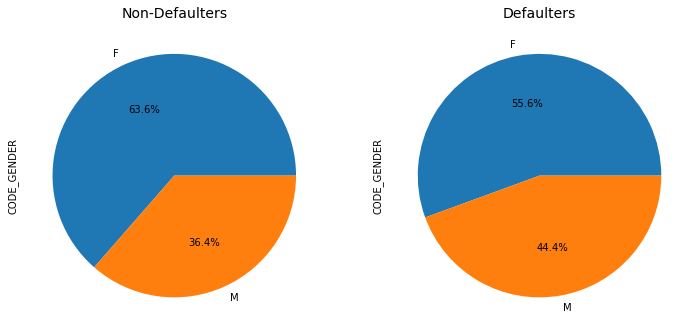

In [66]:
# Plotting pieplot for "CODE_GENDER" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
df_0.CODE_GENDER.value_counts(normalize=True).plot.pie(ax=ax[0], autopct="%.1f%%")
ax[0].set_title("Non-Defaulters", fontdict={"fontsize":14})

df_1.CODE_GENDER.value_counts(normalize=True).plot.pie(ax=ax[1], autopct="%.1f%%")
ax[1].set_title("Defaulters", fontdict={"fontsize":14})

fig.set_size_inches(12,7)

plt.show()

- Females are getting more loan than males but males tends to be more defaulters.

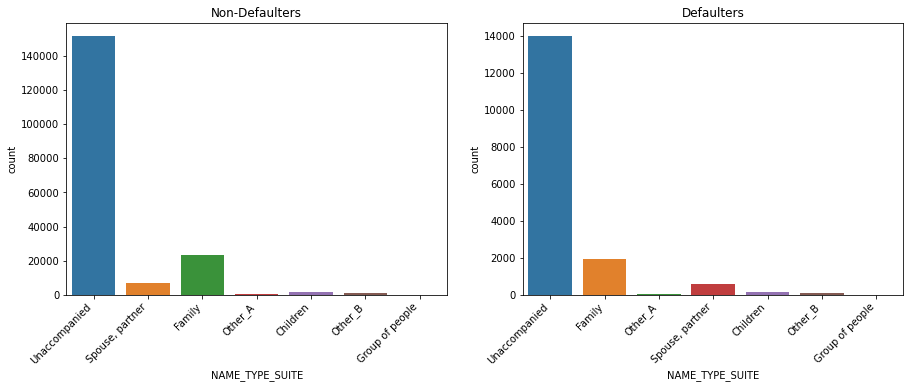

In [67]:
# Plotting countplot for "NAME_TYPE_SUITE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(df_0.NAME_TYPE_SUITE, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.countplot(df_1.NAME_TYPE_SUITE, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,5)

plt.show()

- Unaccompanied category are getting more loans than others.- 

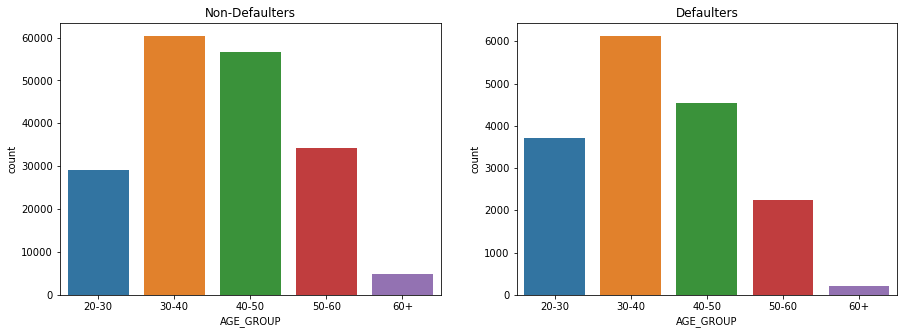

In [68]:
# Plotting countplot for "AGE_GROUP" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="AGE_GROUP", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="AGE_GROUP", data=df_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- 30-50 age group avails highest loan and above 60 age group avails lowest loan.

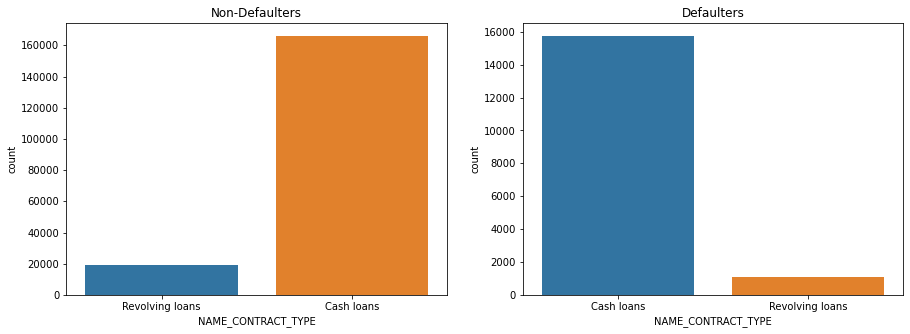

In [69]:
# Plotting pieplot for "NAME_CONTRACT_TYPE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_CONTRACT_TYPE", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="NAME_CONTRACT_TYPE", data=df_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Cash loans is preferred most.

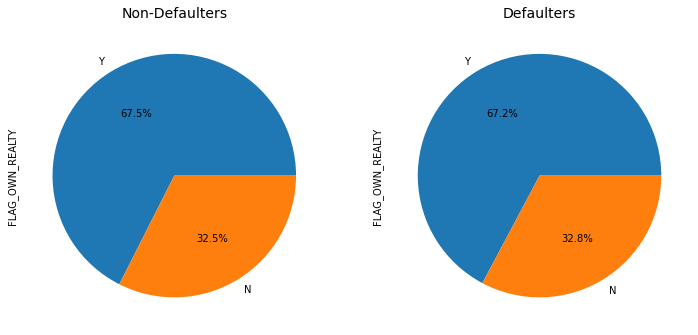

In [70]:
# Plotting pieplot for "FLAG_OWN_REALTY" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
df_0.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(ax=ax[0], autopct="%.1f%%")
ax[0].set_title("Non-Defaulters", fontdict={"fontsize":14})

df_1.FLAG_OWN_REALTY.value_counts(normalize=True).plot.pie(ax=ax[1], autopct="%.1f%%")
ax[1].set_title("Defaulters", fontdict={"fontsize":14})

fig.set_size_inches(12,14)

plt.show()

- Maximum clients have their own house/flat.

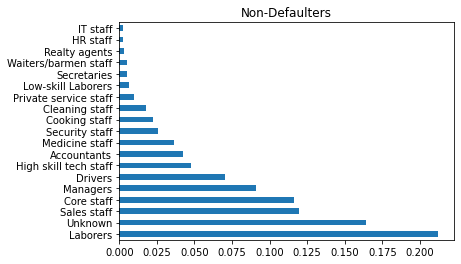

In [71]:
# Plotting barplot for "OCCUPATION_TYPE" for non-defaulters:
df_0.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh().set_title("Non-Defaulters")

plt.show()

- Laborers avails highest loan and IT staff avails less loans.

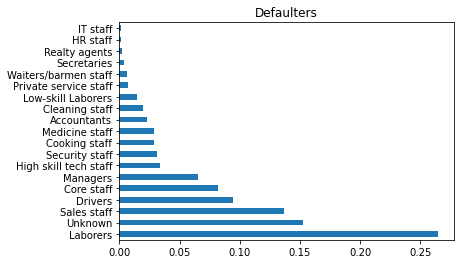

In [72]:
# Plotting barplot for "OCCUPATION_TYPE" for defaulters:
df_1.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh().set_title("Defaulters")
plt.show()

- Laborers avails highest loan and IT staff avails less loans.

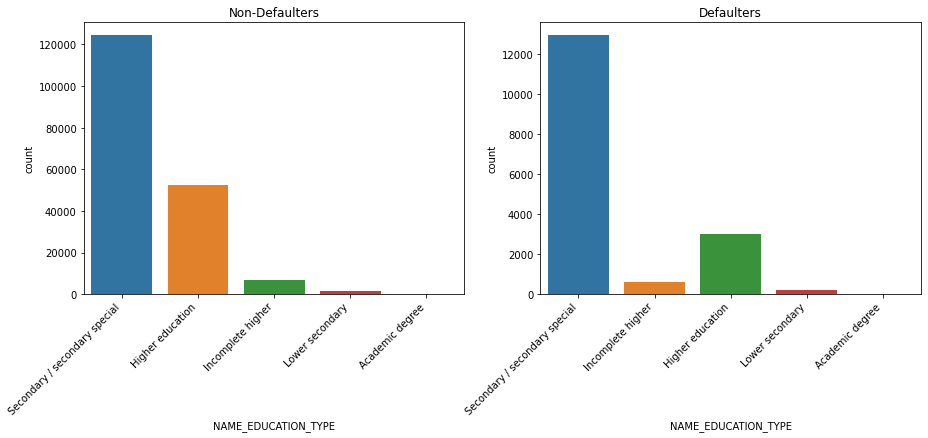

In [73]:
# Plotting countplot for "NAME_EDUCATION_TYPE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_EDUCATION_TYPE", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.countplot(x="NAME_EDUCATION_TYPE", data=df_1, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,5)

plt.show()

- Secondary education type avails highest loans and academic degree education type avails lowest loans.

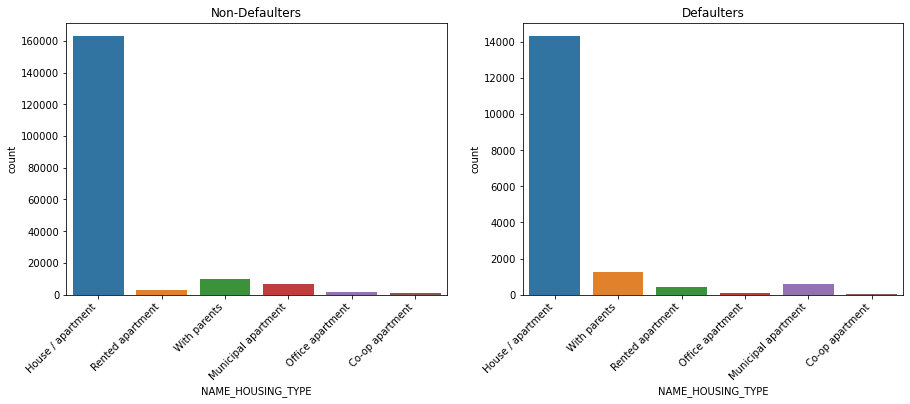

In [74]:
# Plotting countplot for "NAME_HOUSING_TYPE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_HOUSING_TYPE", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.countplot(x="NAME_HOUSING_TYPE", data=df_1, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,5)

plt.show()

- People with house/Apartment avails highest no. of loans.

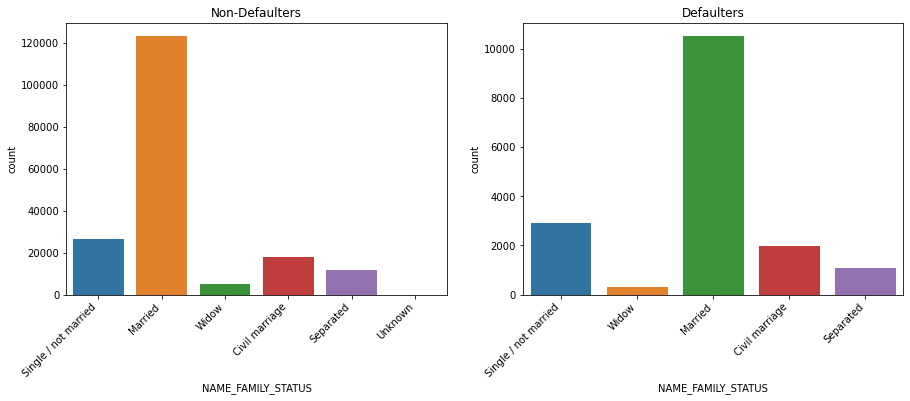

In [75]:
# Plotting countplot for "NAME_FAMILY_STATUS" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_FAMILY_STATUS", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.countplot(x="NAME_FAMILY_STATUS", data=df_1, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,5)

plt.show()

- Married people avails maximum no. of loans.

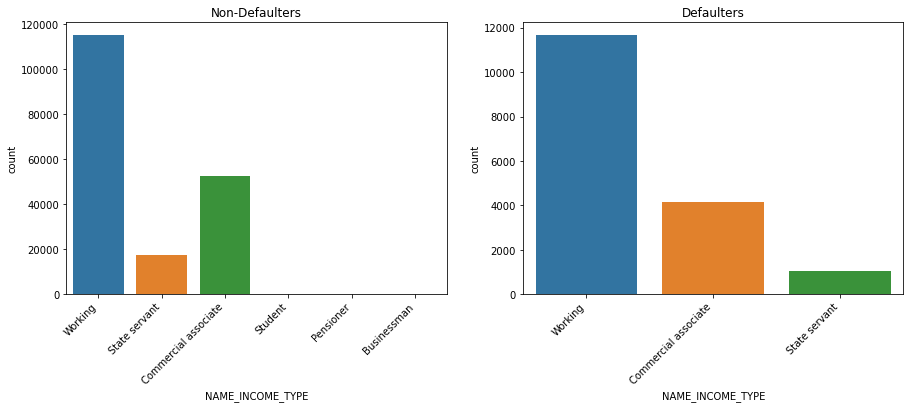

In [76]:
# Plotting countplot for "NAME_INCOME_TYPE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_INCOME_TYPE", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.countplot(x="NAME_INCOME_TYPE", data=df_1, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,5)

plt.show()

-  Working Professionals are availing maximum no. of loan followed by Commercial associates and state servant.
-  Student, Pensioner and Businessman are non-defaulters.

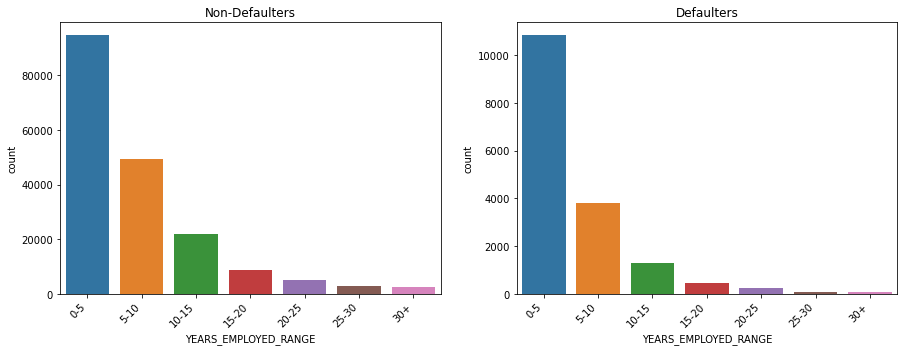

In [77]:
# Plotting countplot for "YEARS_EMPLOYED_RANGE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="YEARS_EMPLOYED_RANGE", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.countplot(x="YEARS_EMPLOYED_RANGE", data=df_1, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,5)

plt.show()

- Employed range 0-5 years avails maximum no. of loan.

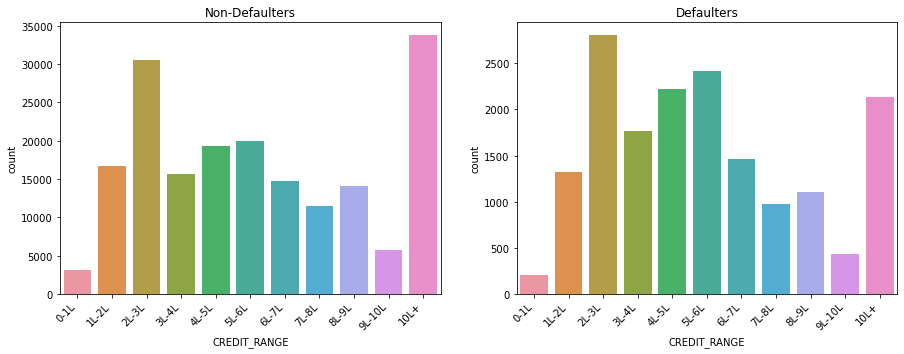

In [78]:
# Plotting countplot for "CREDIT_RANGE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="CREDIT_RANGE", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.countplot(x="CREDIT_RANGE", data=df_1, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,5)

plt.show()

- Highest loans are of credit range from 2-3lakhs and above 10 lakhs.

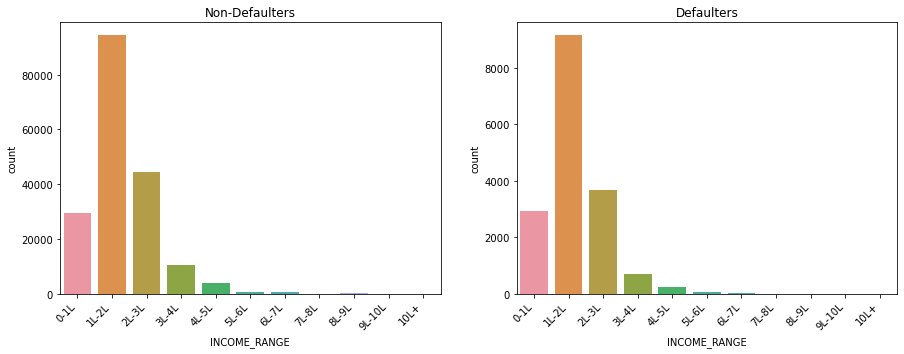

In [79]:
# Plotting countplot for "INCOME_RANGE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="INCOME_RANGE", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.countplot(x="INCOME_RANGE", data=df_1, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,5)

plt.show()

- Highest loan avail by income group ranges from 1-2 lakhs.

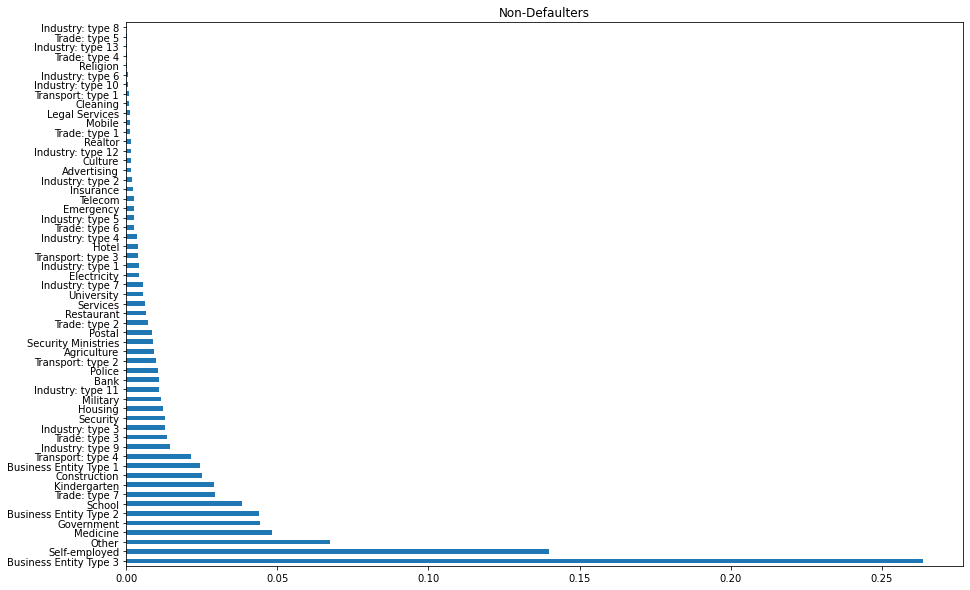

In [80]:
# Plotting barchart for "ORGANIZATION_TYPE" for non-defaulters:
plt.figure(figsize=[15,10])
df_0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh().set_title("Non-Defaulters")

plt.show()

- "Business entity" organization type avails maximum no. of loan followed by "self-employed".

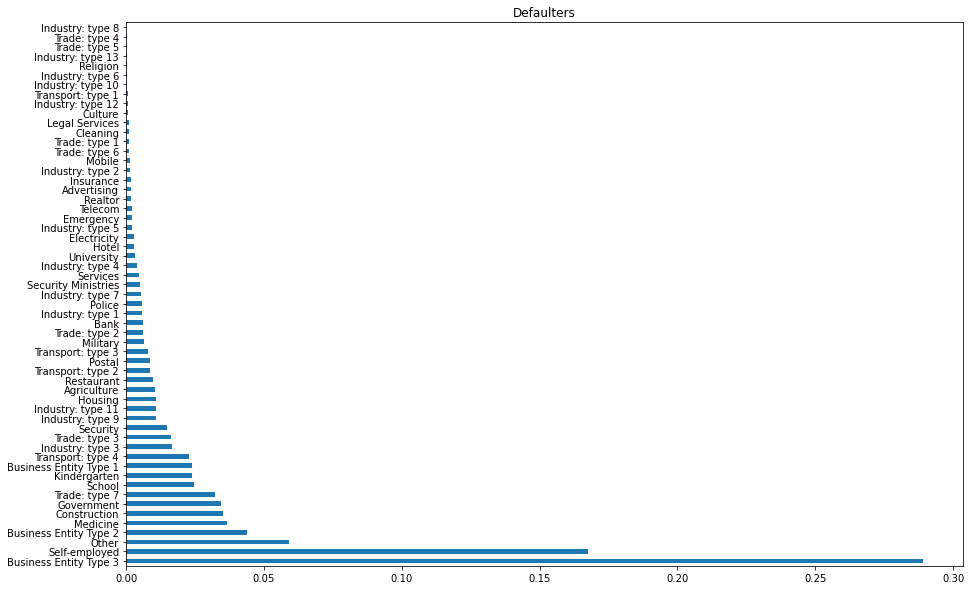

In [81]:
# Plotting bargraph for "ORGANIZATION_TYPE" for defaulters:
plt.figure(figsize=[15,10])
df_1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh().set_title("Defaulters")

plt.show()

- "Business entity" organization type avails maximum no. of loan followed by "self-employed".

#### CORRELATION MATRIX OF DEFAULTERS AND NON-DEFAULTERS:

In [82]:
# First we will create correlation matrix of numerical varibles of "TARGET" Variable:
nd= df_0.iloc[0:,2:].corr(method="spearman")
d = df_1.iloc[0:,2:].corr(method="spearman")

In [83]:
nd #fetching correlation matrix of non-defaulters group.

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
CNT_CHILDREN            1.000000         -0.022511   -0.027572    -0.011245   
AMT_INCOME_TOTAL       -0.022511          1.000000    0.393490     0.467235   
AMT_CREDIT             -0.027572          0.393490    1.000000     0.826692   
AMT_ANNUITY            -0.011245          0.467235    0.826692     1.000000   
AMT_GOODS_PRICE        -0.030749          0.397064    0.984472     0.823364   
EXT_SOURCE_2           -0.027486          0.175396    0.130396     0.126000   
EXT_SOURCE_3           -0.016165         -0.068235    0.044293     0.036879   
AGE                    -0.287948          0.039730    0.157267     0.090657   
YEARS_EMPLOYED         -0.038957          0.043302    0.091216     0.063844   
YEARS_REGISTRATION     -0.158760         -0.045635    0.015602    -0.010293   
YEARS_ID_PUBLISH        0.122043          0.025213    0.029794     0.021440   

                    AMT_GOODS_PRICE  EXT_SOURCE_2  EXT_SOURCE_3       AGE  \
CNT_CHILDREN              -0.030749     -0.027486     -0.016165 -0.287948   
AMT_INCOME_TOTAL           0.397064      0.175396     -0.068235  0.039730   
AMT_CREDIT                 0.984472      0.130396      0.044293  0.157267   
AMT_ANNUITY                0.823364      0.126000      0.036879  0.090657   
AMT_GOODS_PRICE            1.000000      0.138555      0.049546  0.156765   
EXT_SOURCE_2               0.138555      1.000000      0.096446  0.140475   
EXT_SOURCE_3               0.049546      0.096446      1.000000  0.176190   
AGE                        0.156765      0.140475      0.176190  1.000000   
YEARS_EMPLOYED             0.095788      0.093097      0.127274  0.299902   
YEARS_REGISTRATION         0.015037      0.071940      0.087924  0.272349   
YEARS_ID_PUBLISH           0.031148      0.051978      0.102492  0.051557   

                    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
CNT_CHILDREN             -0.038957           -0.158760          0.122043  
AMT_INCOME_TOTAL          0.043302           -0.045635          0.025213  
AMT_CREDIT                0.091216            0.015602          0.029794  
AMT_ANNUITY               0.063844           -0.010293          0.021440  
AMT_GOODS_PRICE           0.095788            0.015037          0.031148  
EXT_SOURCE_2              0.093097            0.071940          0.051978  
EXT_SOURCE_3              0.127274            0.087924          0.102492  
AGE                       0.299902            0.272349          0.051557  
YEARS_EMPLOYED            1.000000            0.129188          0.092176  
YEARS_REGISTRATION        0.129188            1.000000          0.025873  
YEARS_ID_PUBLISH          0.092176            0.025873          1.000000

In [84]:
d #fetching correlation matrix of defaulters group.

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
CNT_CHILDREN            1.000000         -0.042395   -0.001701     0.017362   
AMT_INCOME_TOTAL       -0.042395          1.000000    0.356211     0.424063   
AMT_CREDIT             -0.001701          0.356211    1.000000     0.809573   
AMT_ANNUITY             0.017362          0.424063    0.809573     1.000000   
AMT_GOODS_PRICE        -0.007908          0.358876    0.975280     0.802299   
EXT_SOURCE_2           -0.015352          0.142068    0.113882     0.107178   
EXT_SOURCE_3            0.000194         -0.048742    0.083805     0.051225   
AGE                    -0.196191          0.098184    0.194544     0.100020   
YEARS_EMPLOYED         -0.012729          0.035187    0.095751     0.054521   
YEARS_REGISTRATION     -0.115437         -0.014712    0.017495    -0.025334   
YEARS_ID_PUBLISH        0.099288          0.043430    0.062228     0.046193   

                    AMT_GOODS_PRICE  EXT_SOURCE_2  EXT_SOURCE_3       AGE  \
CNT_CHILDREN              -0.007908     -0.015352      0.000194 -0.196191   
AMT_INCOME_TOTAL           0.358876      0.142068     -0.048742  0.098184   
AMT_CREDIT                 0.975280      0.113882      0.083805  0.194544   
AMT_ANNUITY                0.802299      0.107178      0.051225  0.100020   
AMT_GOODS_PRICE            1.000000      0.124763      0.088957  0.192618   
EXT_SOURCE_2               0.124763      1.000000      0.076335  0.143745   
EXT_SOURCE_3               0.088957      0.076335      1.000000  0.145441   
AGE                        0.192618      0.143745      0.145441  1.000000   
YEARS_EMPLOYED             0.104393      0.087130      0.083232  0.255205   
YEARS_REGISTRATION         0.018406      0.075834      0.059737  0.190382   
YEARS_ID_PUBLISH           0.067771      0.066212      0.110874  0.118060   

                    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
CNT_CHILDREN             -0.012729           -0.115437          0.099288  
AMT_INCOME_TOTAL          0.035187           -0.014712          0.043430  
AMT_CREDIT                0.095751            0.017495          0.062228  
AMT_ANNUITY               0.054521           -0.025334          0.046193  
AMT_GOODS_PRICE           0.104393            0.018406          0.067771  
EXT_SOURCE_2              0.087130            0.075834          0.066212  
EXT_SOURCE_3              0.083232            0.059737          0.110874  
AGE                       0.255205            0.190382          0.118060  
YEARS_EMPLOYED            1.000000            0.086746          0.096059  
YEARS_REGISTRATION        0.086746            1.000000          0.053675  
YEARS_ID_PUBLISH          0.096059            0.053675          1.000000

In [85]:
# Now we will define a function to create heatmap of the above correlation of "TARGET" variable to have better understanding:
def correl(data, title):
    plt.figure(figsize=[15,10])
    sns.heatmap(data, cmap="YlGnBu", annot=True)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

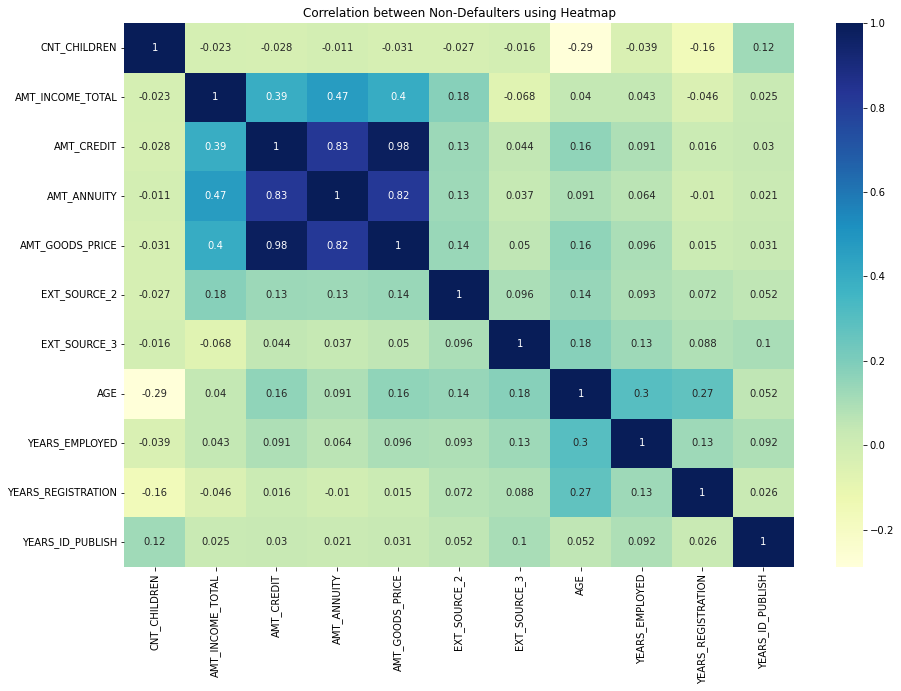

In [86]:
correl(data=nd, title="Correlation between Non-Defaulters using Heatmap")

#### CORRELATION INSIGHTS OF NON-DEFAULTERS DATAFRAME:
-  AMT_CREDIT and AMT_GOODS_PRICE has highest correlation which is equal to 0.98.
-  AMT_CREDIT and AMT_ANNUITY has positive correlation.
-  AMT_ANNUITY and AMT_GOODS_PRICE has positive correlation.
-  AMT_INCOME_TOTAL and AMT_ANNUITY has positive correlation.
-  AMT_INCOME_TOTAL and AMT_CREDIT has positive correlation.
-  AMT_INCOME_TOTAL and AMT_GOODS_PRICE has positive correlation.
-  AGE and YEARS_EMPLOYED has positive correlation.
-  AMT_INCOME_TOTAL and EXT_SOURCE_3 has negative correlation.
-  EXT_SOURCE_2 and AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE has positive correlation.
-  AGE and EXT_SOURCE_2, EXT_SOURCE_3 has positive correlation.

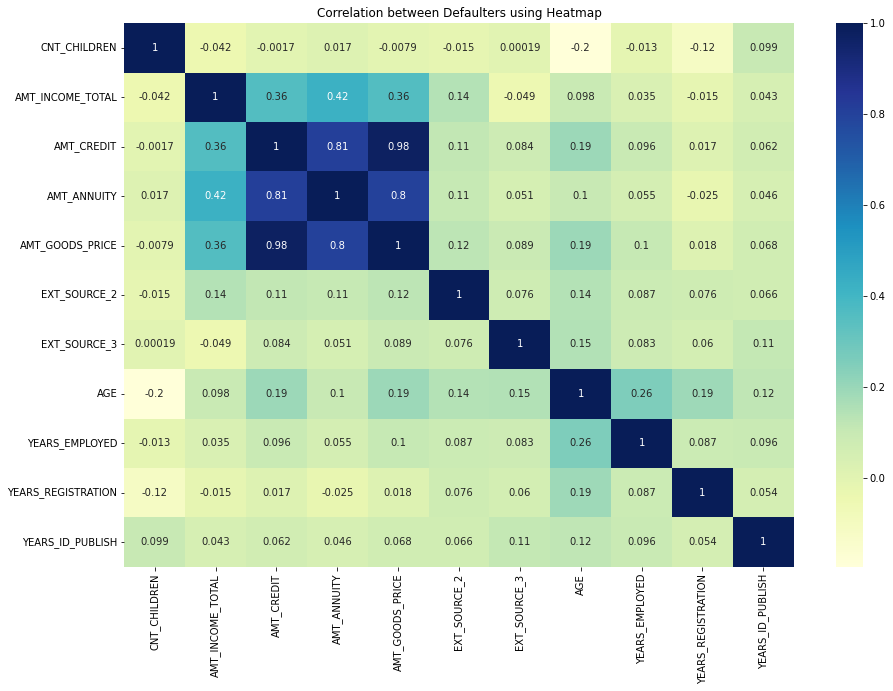

In [87]:
correl(d, "Correlation between Defaulters using Heatmap")

#### CORRELATION INSIGHTS OF DEFAULTERS DATAFRAME:
-  AMT_CREDIT and AMT_GOODS_PRICE has highest correlation which is equal to 0.98.
-  AMT_CREDIT and AMT_ANNUITY has positive correlation.
-  AMT_ANNUITY and AMT_GOODS_PRICE has positive correlation.
-  AMT_INCOME_TOTAL and AMT_ANNUITY has positive correlation.
-  AMT_INCOME_TOTAL and AMT_CREDIT has positive correlation.
-  AMT_INCOME_TOTAL and AMT_GOODS_PRICE has positive correlation.
-  AGE and YEARS_EMPLOYED has positive correlation.
-  AMT_INCOME_TOTAL and EXT_SOURCE_3 has negative correlation.
-  EXT_SOURCE_2 and AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE has positive correlation.
-  AGE and EXT_SOURCE_2, EXT_SOURCE_3 has positive correlation.

### BIVARIATE/MULTIVARIATE ANALYSIS:

#### NUMERICAL-NUMERICAL VARIABLES:

<Figure size 1080x1080 with 0 Axes>

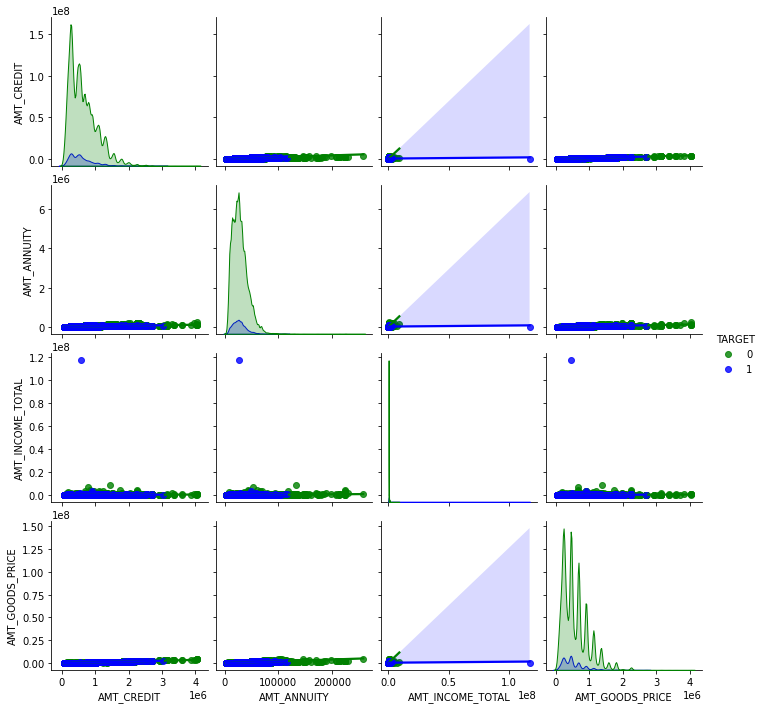

In [88]:
# Plotting pairplot for "AMT_CREDIT", "AMT_ANNUITY", "AMT_INCOME_TOTAL" and "AMT_GOODS_PRICE" for defaulters and non-defaulters:
data= df[["AMT_CREDIT", "AMT_ANNUITY", "AMT_INCOME_TOTAL", "AMT_GOODS_PRICE", "TARGET"]]
plt.figure(figsize=[15,15])
sns.pairplot(data, kind="reg", diag_kind="kde", hue="TARGET", palette=["g", "b"])

plt.show()

**This shows there is high correlation between these variables.**
-  High annuity shows for low income.
-  Defaulters are mostly shown in low income group.
-  Amount of goods price is high for low income group.
-  For lower amount of goods price, credited amount is high.

<Figure size 1080x1080 with 0 Axes>

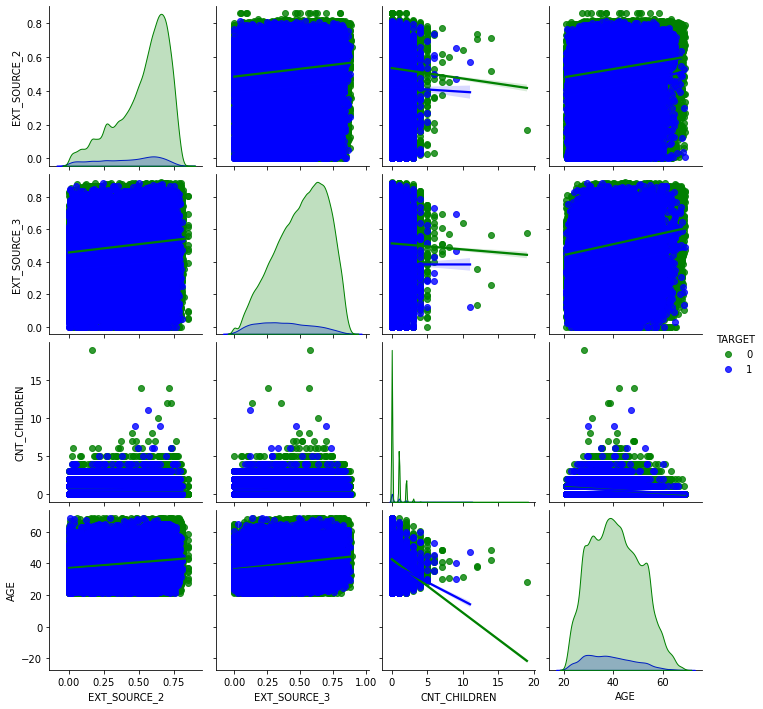

In [89]:
# Plotting pairplot for "EXT_SOURCE_2", "EXT_SOURCE_3", "CNT_CHILDREN" and "AGE" for defaulters and non-defaulters:
data= df[["EXT_SOURCE_2", "EXT_SOURCE_3", "CNT_CHILDREN", "AGE", "TARGET"]]
plt.figure(figsize=[15,15])
sns.pairplot(data, kind="reg", diag_kind="kde", hue="TARGET", palette=["g", "b"])

plt.show()

<Figure size 1080x1080 with 0 Axes>

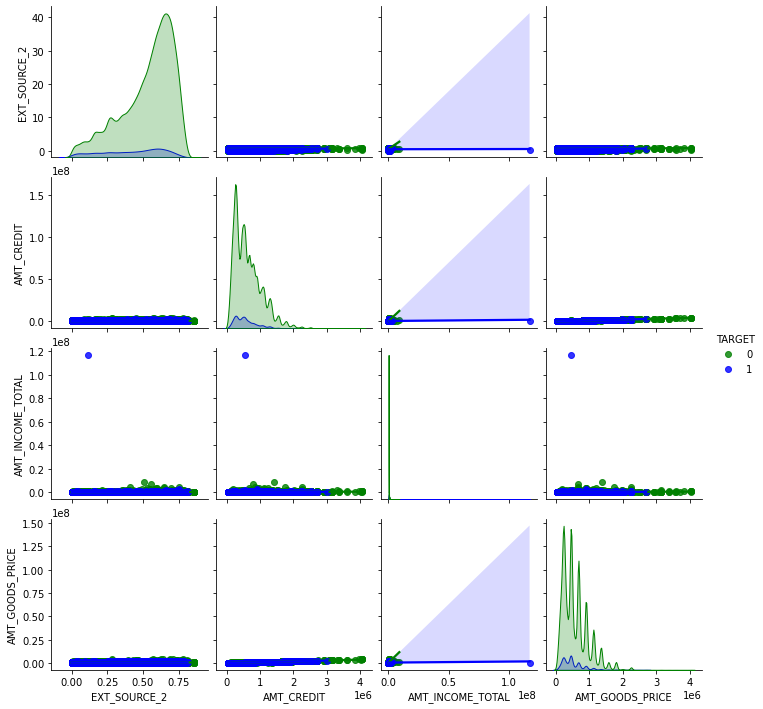

In [90]:
# Plotting pairplot for "EXT_SOURCE_2", "AMT_CREDIT", "AMT_INCOME_TOTAL" and "AMT_GOODS_PRICE" for defaulters and non-defaulters:
data= df[["EXT_SOURCE_2", "AMT_CREDIT", "AMT_INCOME_TOTAL", "AMT_GOODS_PRICE", "TARGET"]]
plt.figure(figsize=[15,15])
sns.pairplot(data, kind="reg", diag_kind="kde", hue="TARGET", palette=["g", "b"])

plt.show()

<Figure size 1440x1080 with 0 Axes>

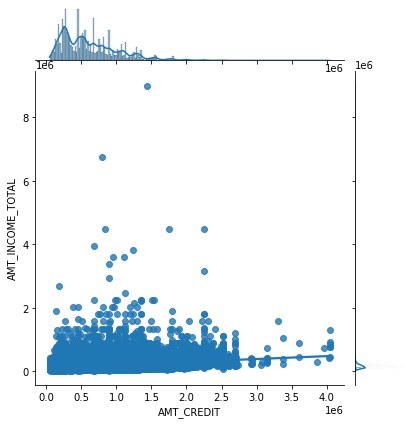

In [91]:
# Plotting jointplot for "AMT_INCOME_TOTAL" vs "AMT_CREDIT" for non-defaulters:
plt.figure(figsize=[20,15])

sns.jointplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", data=df_0, kind="reg")

plt.show()

- Higher amount is credited for low income group.

<Figure size 1440x1080 with 0 Axes>

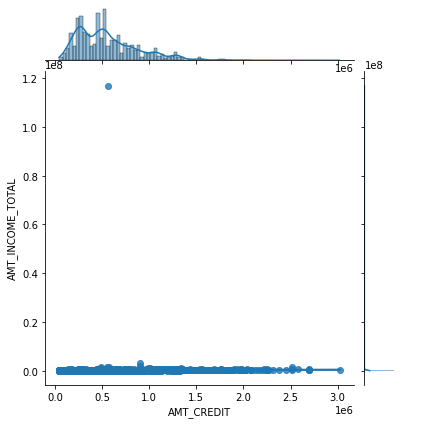

In [92]:
# Plotting jointplot for "AMT_INCOME_TOTAL" vs "AMT_CREDIT" for defaulters:
plt.figure(figsize=[20,15])

sns.jointplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL", data=df_1, kind="reg")

plt.show()

- Defaulters are majorly from low income group.

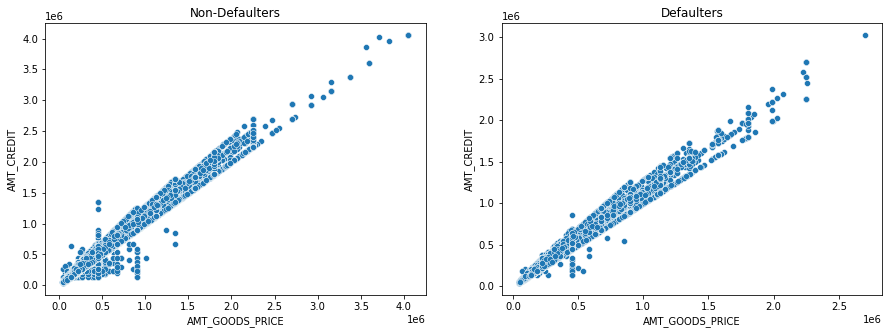

In [93]:
# Plotting scatterplot for "AMT_GOODS_PRICE" vs "AMT_CREDIT" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.scatterplot(x="AMT_GOODS_PRICE", y="AMT_CREDIT", data=df_0, estimator="mean", ax=ax[0]).set_title("Non-Defaulters")
sns.scatterplot(x="AMT_GOODS_PRICE", y="AMT_CREDIT", data=df_1, estimator="mean", ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Linear relation is between the two variables. Maximum non-defaulters are having lower amount credited for lower amount of goods.

<Figure size 1440x1080 with 0 Axes>

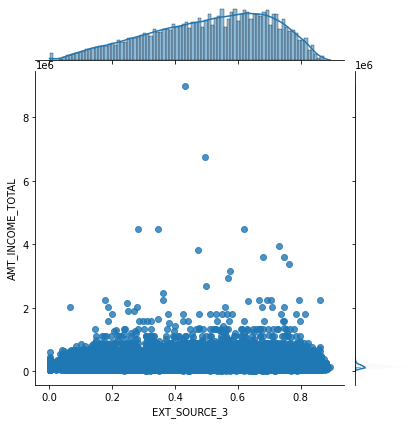

In [94]:
# Plotting jointplot for "EXT_SOURCE_3" vs "AMT_INCOME_TOTAL" for non-defaulters:
plt.figure(figsize=[20,15])

sns.jointplot(x="EXT_SOURCE_3", y="AMT_INCOME_TOTAL", data=df_0, kind="reg")

plt.show()

- Low income group are having increasing credit scores.

<Figure size 1440x1080 with 0 Axes>

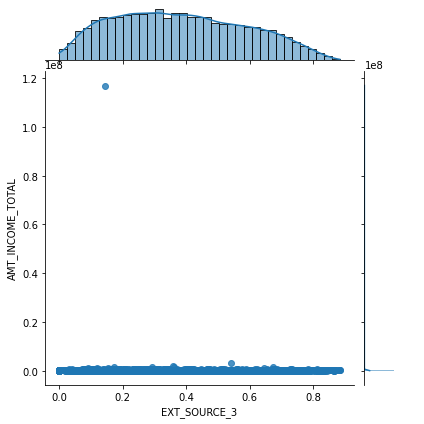

In [95]:
# Plotting jointplot for "EXT_SOURCE_3" vs "AMT_INCOME_TOTAL" for defaulters:
plt.figure(figsize=[20,15])

sns.jointplot(x="EXT_SOURCE_3", y="AMT_INCOME_TOTAL", data=df_1, kind="reg")

plt.show()

- Low income group are having increasing credit scores.

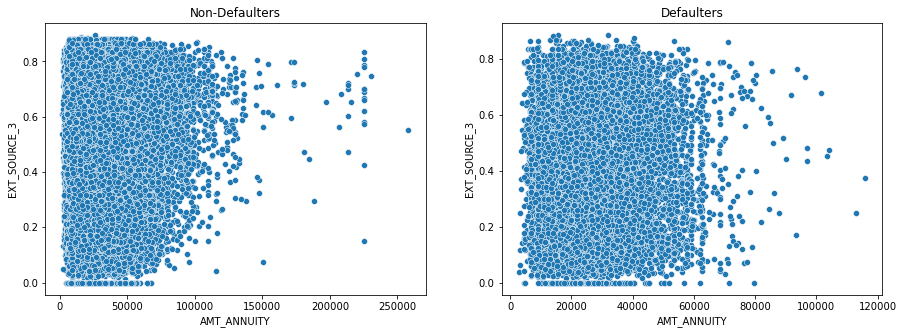

In [96]:
# Plotting scatterplot for "AMT_ANNUITY" vs "EXT_SOURCE_3" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.scatterplot(x="AMT_ANNUITY", y="EXT_SOURCE_3", data=df_0, estimator="mean", ax=ax[0], ci="sd").set_title("Non-Defaulters")
sns.scatterplot(x="AMT_ANNUITY", y="EXT_SOURCE_3", data=df_1, estimator="mean", ax=ax[1], ci="sd").set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- There is no linear correlation between these variables.

#### NUMERICAL-CATEGORICAL ANALYSIS:

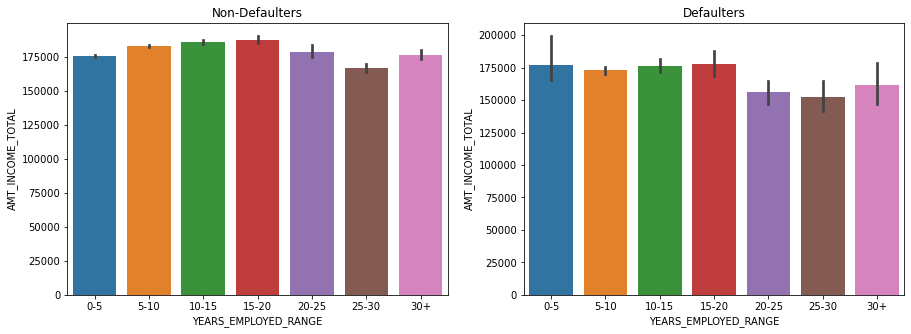

In [97]:
# Plotting barplot for "YEARS_EMPLOYED_RANGE" vs "AMT_INCOME_TOTAL" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.barplot(df_0.YEARS_EMPLOYED_RANGE, df_0.AMT_INCOME_TOTAL, ax=ax[0]).set_title("Non-Defaulters")
sns.barplot(df_1.YEARS_EMPLOYED_RANGE, df_1.AMT_INCOME_TOTAL, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Non-Defaulters are employed from 10-20 years range and defaulters are having employement range from 0-5 years.

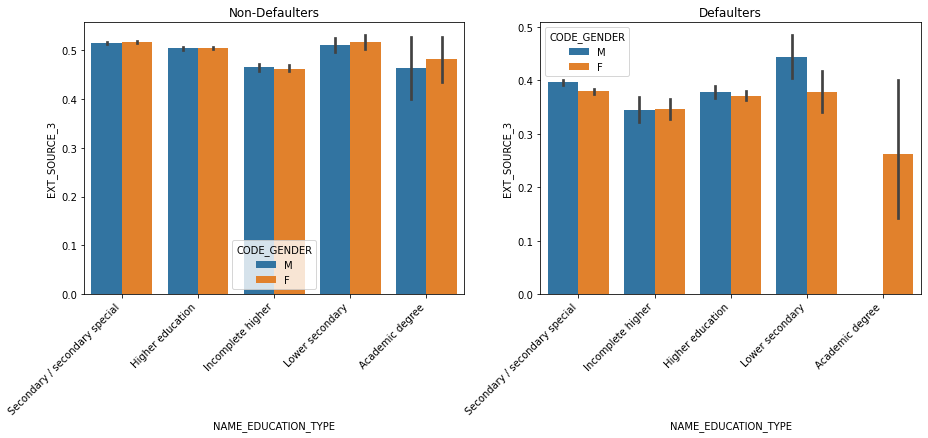

In [98]:
# Plotting barplot for "NAME_EDUCATION_TYPE" vs "EXT_SOURCE_3" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.barplot(df_0.NAME_EDUCATION_TYPE, df_0.EXT_SOURCE_3, hue="CODE_GENDER", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.barplot(df_1.NAME_EDUCATION_TYPE, df_1.EXT_SOURCE_3, hue="CODE_GENDER", data=df_1, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,5)

plt.show()

- Males having Academic degree are not defaulters whereas females are defaulters with high error values.
- Secondary education type has maximum credit score.
- Males with lower secondary are more defaulters.
- Non-Defaulters are having average score more than 0.4.

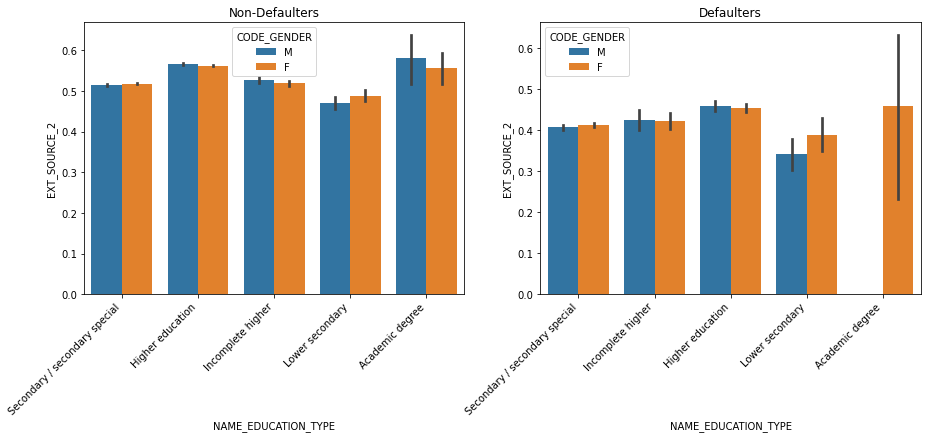

In [99]:
# Plotting barplot for "NAME_EDUCATION_TYPE" vs "EXT_SOURCE_2" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.barplot(df_0.NAME_EDUCATION_TYPE, df_0.EXT_SOURCE_2, hue="CODE_GENDER", data=df_0, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.barplot(df_1.NAME_EDUCATION_TYPE, df_1.EXT_SOURCE_2, hue="CODE_GENDER", data=df_1, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,5)

plt.show()

- Males having Academic degree are not defaulters whereas females are defaulters with high error values.
- Academic degree and higher education type has maximum credit score.
- Defaulters are having credit score less than 0.4.

#### CATEGORICAL-CATEGORICAL ANALYSIS:

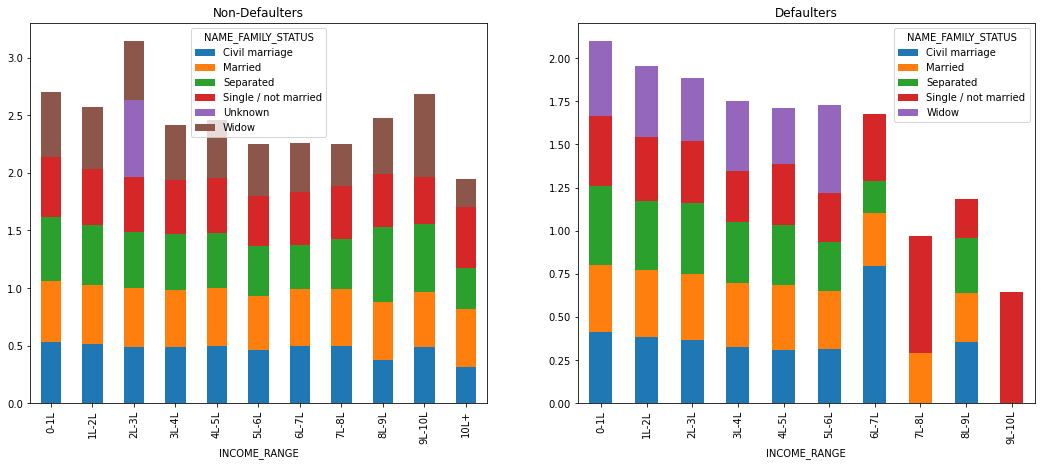

In [100]:
# Plotting stacked barchart for "INCOME_RANGE" vs "NAME_FAMILY_STATUS" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
a = pd.pivot_table(data=df_0, values="EXT_SOURCE_3", index="INCOME_RANGE", columns="NAME_FAMILY_STATUS", aggfunc="mean")
a.plot(kind="bar", stacked=True, ax=ax[0]).set_title("Non-Defaulters")

b= pd.pivot_table(data=df_1, values="EXT_SOURCE_3", index="INCOME_RANGE", columns="NAME_FAMILY_STATUS", aggfunc="mean")
b.plot(kind="bar", stacked=True, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(18,7)
plt.show()

- Singles and civil marriage with high income range are more likely to be defaulters.
- Low income range group face difficulty in loan repayments.

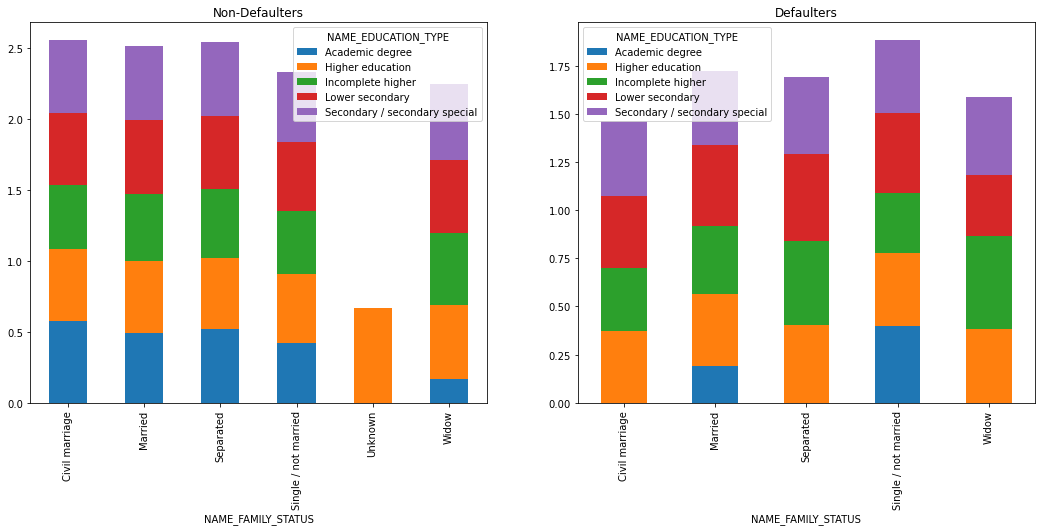

In [101]:
# Plotting stacked barchart for "NAME_EDUCATION_TYPE" vs "NAME_FAMILY_STATUS" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
a = pd.pivot_table(data=df_0, values="EXT_SOURCE_3", index="NAME_FAMILY_STATUS", columns="NAME_EDUCATION_TYPE", aggfunc="mean")
a.plot(kind="bar", stacked=True, ax=ax[0]).set_title("Non-Defaulters")

b= pd.pivot_table(data=df_1, values="EXT_SOURCE_3", index="NAME_FAMILY_STATUS", columns="NAME_EDUCATION_TYPE", aggfunc="mean")
b.plot(kind="bar", stacked=True, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(18,7)
plt.show()

- Civil marriage and singles having lower secondary and secondary education are more likely to be defaulters.
- Academic degree are more likely to be non-defaulters.

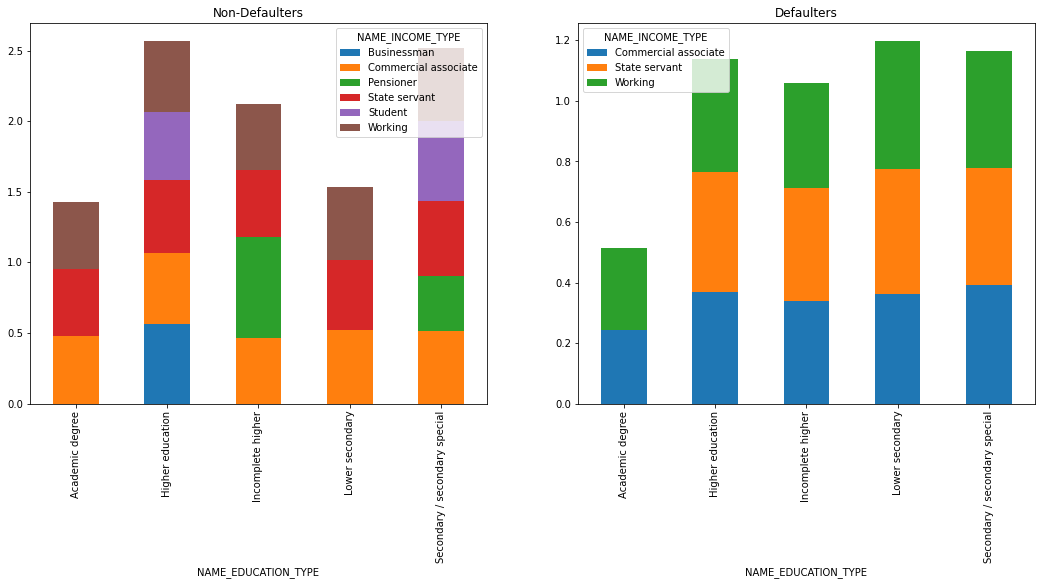

In [102]:
# Plotting stacked barchart for "NAME_EDUCATION_TYPE" vs "NAME_INCOME_TYPE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
a = pd.pivot_table(data=df_0, values="EXT_SOURCE_3", index="NAME_EDUCATION_TYPE", columns="NAME_INCOME_TYPE", aggfunc="mean")
a.plot(kind="bar", stacked=True, ax=ax[0]).set_title("Non-Defaulters")

b= pd.pivot_table(data=df_1, values="EXT_SOURCE_3", index="NAME_EDUCATION_TYPE", columns="NAME_INCOME_TYPE", aggfunc="mean")
b.plot(kind="bar", stacked=True, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(18,7)
plt.show()

- Student, Businessman and Pensioner are a safe target to be non-defaulters having secondary and higher education.

### Now we load "previous_application" dataframe for final analysis:

In [103]:
df_p = pd.read_csv("previous_application.csv")
df_p.head() #fetching first 5 rows of df_p.

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [104]:
df_p.shape #to check no. of rows x no. of columns.

(1670214, 37)

In [105]:
df_p.dtypes #checking data types of all columns.

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [106]:
# fetch info of all the columns:
print(df_p.info("all")) #all argument is used to fetch data of all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### DATA CLEANING AND MANIPULATIONS:
#### Null Values:

In [107]:
null = df_p.isnull().mean() #listing null values columns in null variable.

#### HANDLING MISSING VALUES:
-  Delete columns having more than 30% missing values.
-  Drop unnecessary columns.
-  Drop rows where missing values are less and does not affect analysis.

In [108]:
null = list(null[null.values>0.3].index) #creating list of variables having null values greater than 30%.
len(null)

11

In [109]:
df_p.drop(labels=null, axis=1, inplace=True) #dropping list of null columns.
df_p.shape #checking shape of df after removing null columns.

(1670214, 26)

In [110]:
# checking for invalid data in column "NAME_CONTRACT_TYPE":
df_p.NAME_CONTRACT_TYPE.value_counts(normalize=True) 

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

In [111]:
df_p.drop(df_p[df_p["NAME_CONTRACT_TYPE"]=="XNA"].index, axis=0, inplace=True) #dropping invalid data.

In [112]:
# checking for invalid data in column "NAME_CLIENT_TYPE":
df_p.NAME_CLIENT_TYPE.value_counts(normalize=True) 

Repeater     0.737160
New          0.180459
Refreshed    0.081219
XNA          0.001162
Name: NAME_CLIENT_TYPE, dtype: float64

In [113]:
df_p.drop(df_p[df_p["NAME_CLIENT_TYPE"]=="XNA"].index, axis=0, inplace=True) #dropping invalid data.

In [114]:
df_p.drop(df_p[df_p["AMT_GOODS_PRICE"].isna()].index, axis=0, inplace=True) #dropping rows of missing data.
df_p.drop(df_p[df_p["AMT_ANNUITY"].isna()].index, axis=0, inplace=True) #dropping rows of missing data.

In [115]:
df_p.isnull().mean() #rechecking for null values.

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

### Standardizing Values & Fixing Invalid Data:

In [116]:
df_p.describe() #shows statistical data of df_p.

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.245419e+06  1.245419e+06  1.245419e+06     1.245419e+06   
mean   1.913837e+06  2.783520e+05  1.605826e+04     2.325457e+05   
std    5.340981e+05  1.027792e+05  1.493002e+04     3.186286e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446918e+06  1.893735e+05  6.327517e+03     5.219550e+04   
50%    1.910149e+06  2.787370e+05  1.125000e+04     1.125000e+05   
75%    2.377960e+06  3.673760e+05  2.060876e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.245419e+06     1.245419e+06             1.245419e+06   
mean   2.492192e+05     2.325756e+05             1.258227e+01   
std    3.465534e+05     3.186471e+05             3.326098e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    5.156100e+04     5.219786e+04             1.000000e+01   
50%    1.161315e+05     1.125000e+05             1.200000e+01   
75%    2.700000e+05     2.475000e+05             1.500000e+01   
max    4.509688e+06     5.850000e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.245419e+06   1.245419e+06      1.245419e+06  1.245419e+06  
mean             9.978923e-01  -1.022490e+03      4.056482e+02  1.671687e+01  
std              4.586157e-02   7.863772e+02      8.248783e+03  1.448323e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.535000e+03     -1.000000e+00  6.000000e+00  
50%              1.000000e+00  -7.670000e+02      2.700000e+01  1.200000e+01  
75%              1.000000e+00  -3.860000e+02      1.460000e+02  2.400000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [117]:
# As seen in the information of above variable: "DAYS_DECISION".
# This column has negative values whereas it should be positive so lets correct the invalid data.
df_p["DAYS_DECISION"] = abs(df_p["DAYS_DECISION"])

-  Plotting boxplots of numerical variables to check Outliers:

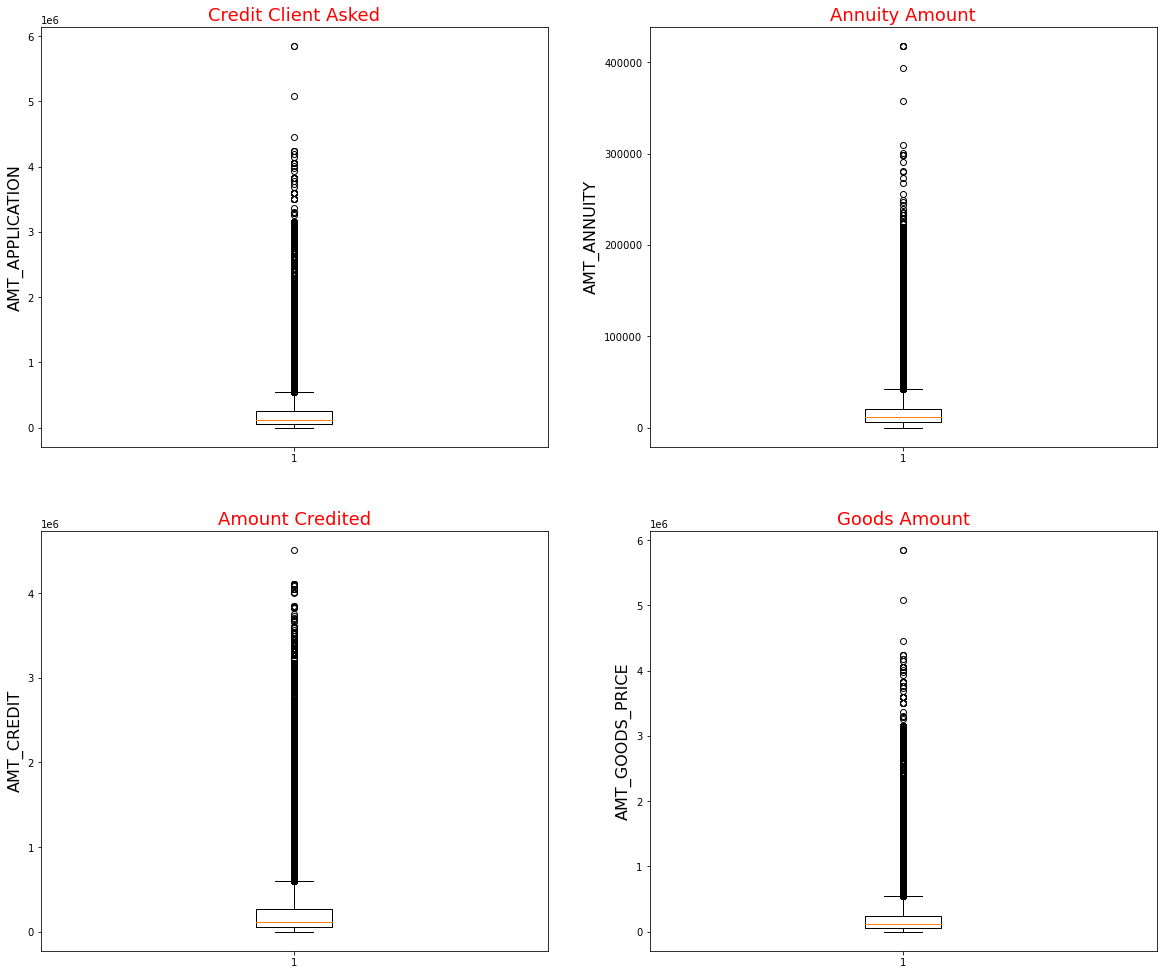

In [118]:
# Plot boxplot for numerical variables:
fig, ax = plt.subplots(2,2)

plot_1 = ax[0][0].boxplot(df_p.AMT_APPLICATION)
ax[0][0].set_title("Credit Client Asked", fontdict={"fontsize":18, "color":"Red"}) #adding title to first plot.
ax[0][0].set_ylabel("AMT_APPLICATION", fontdict={"fontsize":16}) #labelling y-axis of first plot.

plot_2 = ax[0][1].boxplot(df_p.AMT_ANNUITY)
ax[0][1].set_title("Annuity Amount", fontdict={"fontsize":18, "color":"Red"}) 
ax[0][1].set_ylabel("AMT_ANNUITY", fontdict={"fontsize":16})

plot_3 = ax[1][0].boxplot(df_p.AMT_CREDIT)
ax[1][0].set_title("Amount Credited", fontdict={"fontsize":18, "color":"Red"}) 
ax[1][0].set_ylabel("AMT_CREDIT", fontdict={"fontsize":16})

plot_4 = ax[1][1].boxplot(df_p.AMT_GOODS_PRICE)
ax[1][1].set_title("Goods Amount", fontdict={"fontsize":18, "color":"Red"}) 
ax[1][1].set_ylabel("AMT_GOODS_PRICE", fontdict={"fontsize":16})

fig.set_size_inches(20,17) #setting space between the graphs.

plt.show() #use to display graphs

### OUTLIERS OBSERVATIONS:

-  "AMT_CREDIT" has many outliers which seems relevant.
-  "AMT_APPLICATION" has outliers which seems relevant.
-  "AMT_ANNUITY" has relevant outliers which seems relevant.
-  "AMT_GOODS_PRICE" has outliers which seems relevant.

### MERGING "APPLICATION DATAFRAME" & "PREVIOUS APPLICATION DATAFRAME" FOR ANALYSIS:

In [119]:
ndf = df.merge(df_p, how="inner", on="SK_ID_CURR") #creating new dataframe by merging "application" dataframe with "previous application" dataframe.
ndf.head() #fetching first 5 rows of new dataframe.

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1           Cash loans           M               Y   
1      100004       0      Revolving loans           M               Y   
2      100008       0           Cash loans           M               Y   
3      100008       0           Cash loans           M               Y   
4      100008       0           Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0             0          202500.0      406597.5        24700.5   
1             0           67500.0      135000.0         6750.0   
2             0           99000.0      490495.5        27517.5   
3             0           99000.0      490495.5        27517.5   
4             0           99000.0      490495.5        27517.5   

   AMT_GOODS_PRICE_x  ... NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
0           351000.0  ...              New              Vehicles   
1           135000.0  ...              New                Mobile   
2           454500.0  ...         Repeater  Consumer Electronics   
3           454500.0  ...              New                Mobile   
4           454500.0  ...        Refreshed                   XNA   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE      CHANNEL_TYPE SELLERPLACE_AREA  \
0            POS               XNA             Stone              500   
1            POS               XNA  Regional / Local               30   
2            POS               XNA      Country-wide              110   
3            POS               XNA      Country-wide               50   
4           Cash            x-sell      Country-wide              110   

   NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0       Auto technology         24.0        low_normal   
1          Connectivity          4.0            middle   
2  Consumer electronics         10.0        low_normal   
3          Connectivity          6.0        low_normal   
4  Consumer electronics         30.0            middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1  POS mobile without interest  
2  POS household with interest  
3     POS mobile with interest  
4          Cash X-Sell: middle  

[5 rows x 53 columns]

#### Dropping unnecessary columns:

In [120]:
ndf.shape #fetching no. of rows x no. of columns of new dataframe.

(709654, 53)

In [121]:
# Dropping columns which have no use in this analysis:
unnecessary_cols= ["SK_ID_PREV", "SK_ID_CURR", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", 
                   "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY", "DAYS_DECISION", "NAME_PAYMENT_TYPE", 
                   "NAME_PORTFOLIO", "NAME_PRODUCT_TYPE", "CHANNEL_TYPE", "SELLERPLACE_AREA", "NAME_SELLER_INDUSTRY", 
                   "CODE_REJECT_REASON", "CNT_PAYMENT", "PRODUCT_COMBINATION"] 
ndf.drop(unnecessary_cols, axis=1, inplace=True)
ndf.shape #checking no. of rows x no. of columns after dropping columns.

(709654, 37)

### CHECKING IMBALANCED DATA:

In [122]:
# First we will check imbalance of data in "Target" Variable:
ndf.TARGET.value_counts(normalize=True)

0    0.912328
1    0.087672
Name: TARGET, dtype: float64

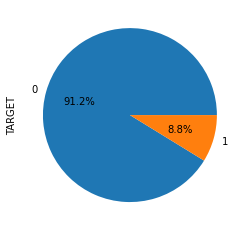

In [123]:
# Plotting imbalance of data in "Target" Variable through piechart:
ndf.TARGET.value_counts(normalize=True).plot.pie(autopct="%.1f%%")
plt.show()

In [124]:
# Check data imbalance in "Gender" variable:
ndf.CODE_GENDER.value_counts(normalize=True)

F    0.637671
M    0.362329
Name: CODE_GENDER, dtype: float64

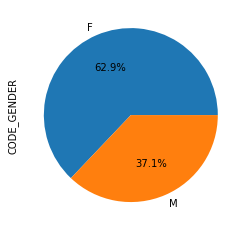

In [125]:
# Plotting data imbalance in "Gender" variable through piechart:
df.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct="%.1f%%")
plt.show()

As seen there is a huge data imbalance in "TARGET" variable.
Approx. 91.2% applicants are Non-Defaulters and 8.8% are Defaulters.<br>
**So, we will divide dataframe into two sets: ndf_0 & ndf_1 i.e non-defaulters & Defaulters respectively for further analysis.**

In [126]:
# Dividing data into two sets:
ndf_0 = ndf[ndf["TARGET"] == 0]  #Non-Defaulters
ndf_1 = ndf[ndf["TARGET"] == 1]  #Defaulters

In [127]:
ndf_0.head() #fetching first 5 rows of non-defaulters dataframe.

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
1       0      Revolving loans           M               Y             0   
2       0           Cash loans           M               Y             0   
3       0           Cash loans           M               Y             0   
4       0           Cash loans           M               Y             0   
5       0           Cash loans           M               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
1           67500.0      135000.0         6750.0           135000.0   
2           99000.0      490495.5        27517.5           454500.0   
3           99000.0      490495.5        27517.5           454500.0   
4           99000.0      490495.5        27517.5           454500.0   
5           99000.0      490495.5        27517.5           454500.0   

   NAME_TYPE_SUITE  ... NAME_CONTRACT_TYPE_y AMT_ANNUITY_y AMT_APPLICATION  \
1    Unaccompanied  ...       Consumer loans      5357.250         24282.0   
2  Spouse, partner  ...       Consumer loans     17885.835        162598.5   
3  Spouse, partner  ...       Consumer loans      8019.090         44455.5   
4  Spouse, partner  ...           Cash loans     25309.575        450000.0   
5  Spouse, partner  ...       Consumer loans     12144.285        121455.0   

  AMT_CREDIT_y AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE  NAME_CONTRACT_STATUS  \
1      20106.0           24282.0                    XAP              Approved   
2     162598.5          162598.5                    XAP              Approved   
3      39955.5           44455.5                    XAP              Approved   
4     501975.0          450000.0                    XNA              Approved   
5     109309.5          121455.0                    XAP              Approved   

   NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  NAME_YIELD_GROUP  
1               New                Mobile            middle  
2          Repeater  Consumer Electronics        low_normal  
3               New                Mobile        low_normal  
4         Refreshed                   XNA            middle  
5          Repeater             Gardening        low_normal  

[5 rows x 37 columns]

In [128]:
ndf_1.head() #fetching first 5 rows of defaulters dataframe.

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
0        1           Cash loans           M               Y             0   
80       1           Cash loans           M               Y             0   
81       1           Cash loans           M               Y             0   
82       1           Cash loans           M               Y             0   
83       1           Cash loans           M               Y             0   

    AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0           202500.0      406597.5        24700.5           351000.0   
80          202500.0     1193580.0        35028.0           855000.0   
81          202500.0     1193580.0        35028.0           855000.0   
82          202500.0     1193580.0        35028.0           855000.0   
83          202500.0     1193580.0        35028.0           855000.0   

   NAME_TYPE_SUITE  ... NAME_CONTRACT_TYPE_y AMT_ANNUITY_y AMT_APPLICATION  \
0    Unaccompanied  ...       Consumer loans      9251.775        179055.0   
80   Unaccompanied  ...           Cash loans     11117.700        157500.0   
81   Unaccompanied  ...           Cash loans     31674.870        675000.0   
82   Unaccompanied  ...       Consumer loans      4586.895         38205.0   
83   Unaccompanied  ...           Cash loans     19197.000        450000.0   

   AMT_CREDIT_y AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE  \
0      179055.0          179055.0                    XAP   
80     157500.0          157500.0                    XNA   
81     744498.0          675000.0                    XNA   
82      34384.5           38205.0                    XAP   
83     450000.0          450000.0                    XNA   

    NAME_CONTRACT_STATUS  NAME_CLIENT_TYPE       NAME_GOODS_CATEGORY  \
0               Approved               New                  Vehicles   
80              Approved         Refreshed                       XNA   
81               Refused          Repeater                       XNA   
82              Approved               New  Photo / Cinema Equipment   
83              Approved          Repeater                       XNA   

    NAME_YIELD_GROUP  
0         low_normal  
80              high  
81        low_normal  
82        low_normal  
83        low_normal  

[5 rows x 37 columns]

### UNIVARIATE ANALYSIS:

#### CATEGORICAL VARIABLE:

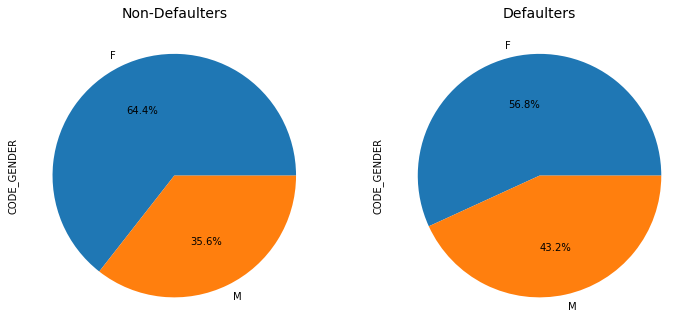

In [129]:
fig, ax = plt.subplots(1,2)
ndf_0.CODE_GENDER.value_counts(normalize=True).plot.pie(ax=ax[0], autopct="%.1f%%")
ax[0].set_title("Non-Defaulters", fontdict={"fontsize":14})

ndf_1.CODE_GENDER.value_counts(normalize=True).plot.pie(ax=ax[1], autopct="%.1f%%")
ax[1].set_title("Defaulters", fontdict={"fontsize":14})

fig.set_size_inches(12,7)

plt.show()

- Males are more likely to be defaulters.
- Females avail majority of loan than males.

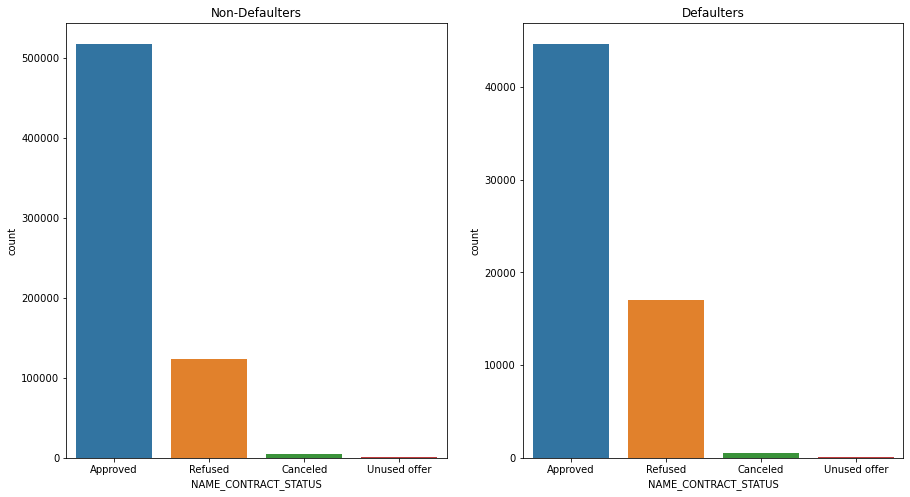

In [130]:
# Plotting countplot for "NAME_CONTRACT_STATUS" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_CONTRACT_STATUS", data=ndf_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="NAME_CONTRACT_STATUS", data=ndf_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,8)

plt.show()

- Refused contracts are more likely to be defaulters.

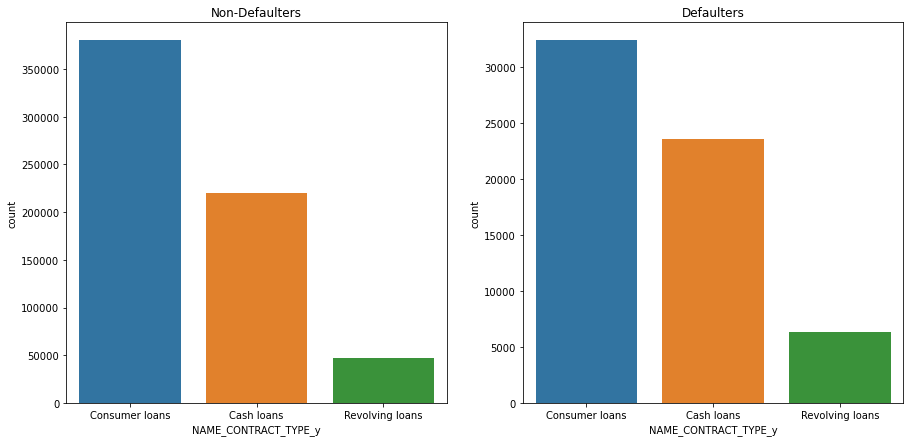

In [131]:
# Plotting countplot for "NAME_CONTRACT_TYPE_y" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_CONTRACT_TYPE_y", data=ndf_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="NAME_CONTRACT_TYPE_y", data=ndf_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,7)

plt.show()

- Consumer loans are mostly applied.

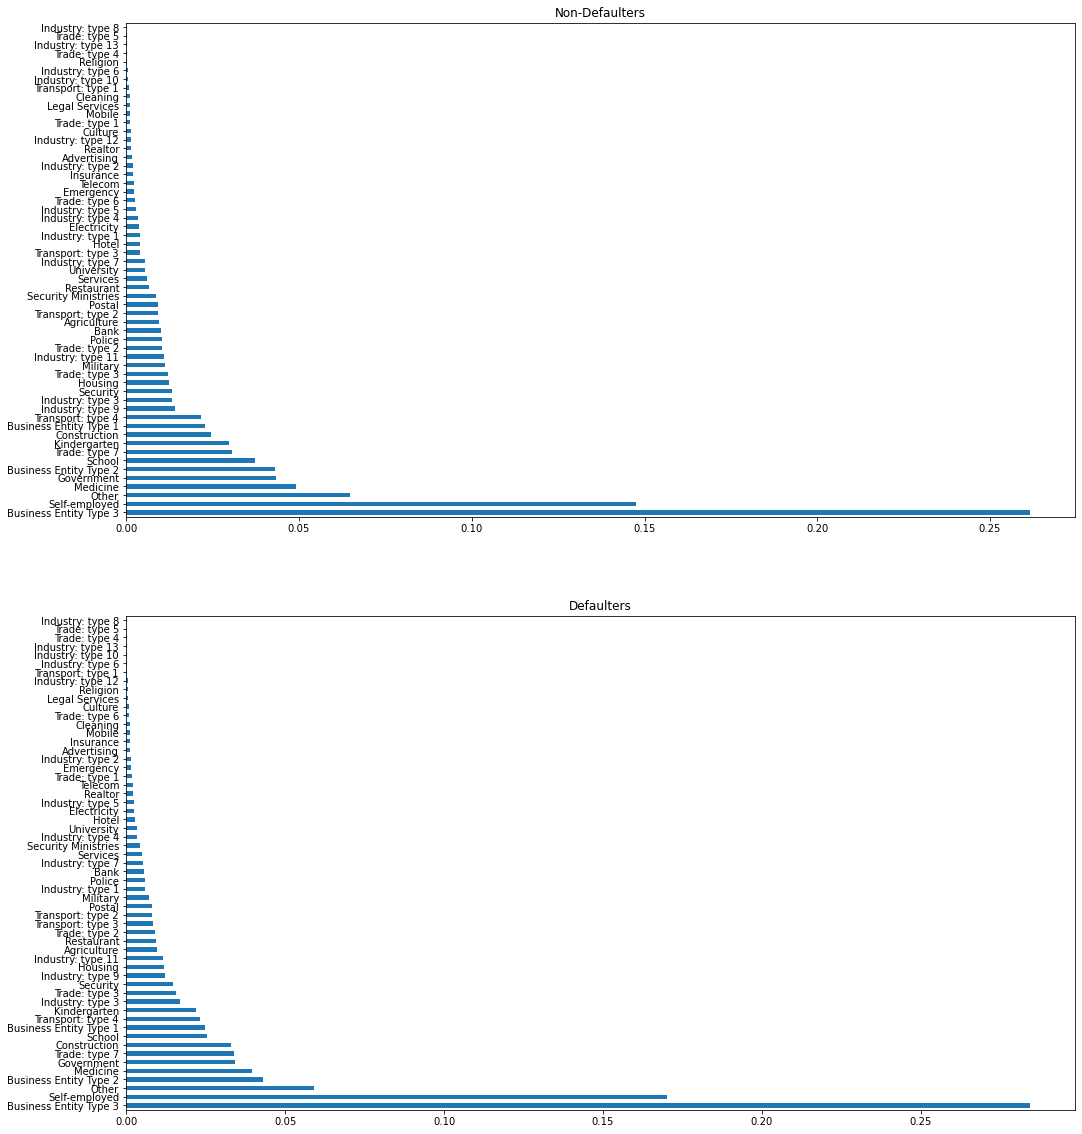

In [132]:
# Plotting barchart for "ORGANIZATION_TYPE" for defaulters and non-defaulters:
fig, ax = plt.subplots(2,1)
ndf_0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh(ax=ax[0]).set_title("Non-Defaulters")
ndf_1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.barh(ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(17,20)
plt.show()

- Business Entity Type 3 and Self Employed have higher proportions of default.

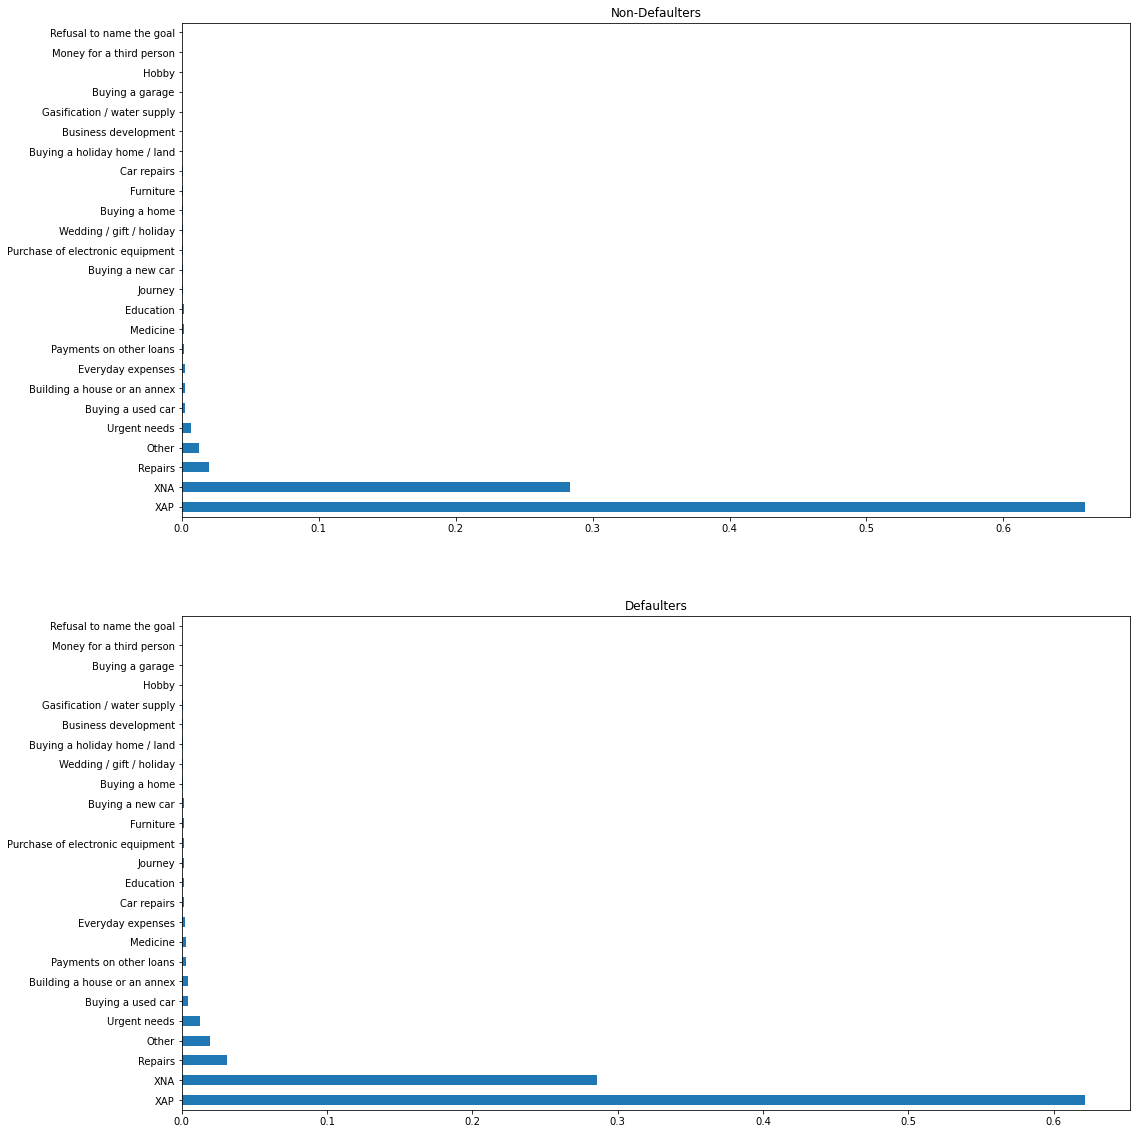

In [133]:
# Plotting barchart for "NAME_CASH_LOAN_PURPOSE" for defaulters and non-defaulters:
fig, ax = plt.subplots(2,1)
ndf_0.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.barh(ax=ax[0]).set_title("Non-Defaulters")
ndf_1.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.barh(ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(17,20)
plt.show()

- Repairs Loan type faces more difficulty in loan repayment.

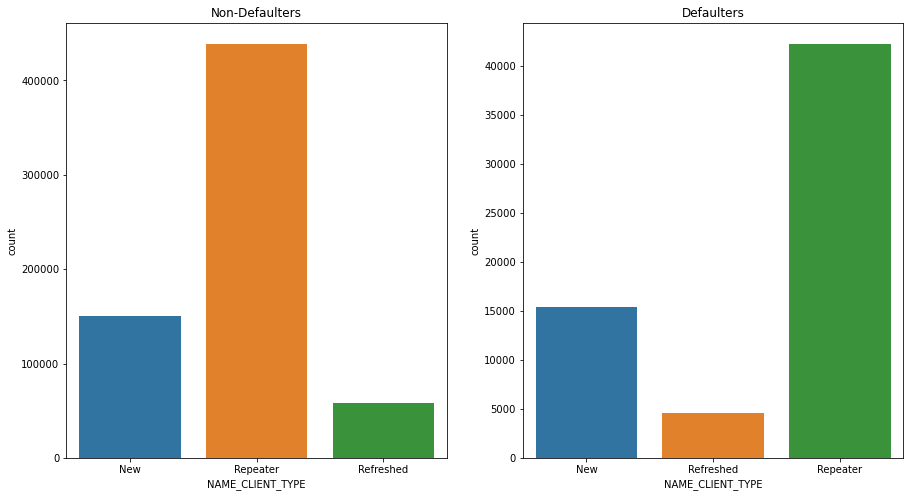

In [134]:
# Plotting countplot for "NAME_CLIENT_TYPE" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_CLIENT_TYPE", data=ndf_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="NAME_CLIENT_TYPE", data=ndf_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,8)

plt.show()

- There are mostly repeated client who applied for loan.

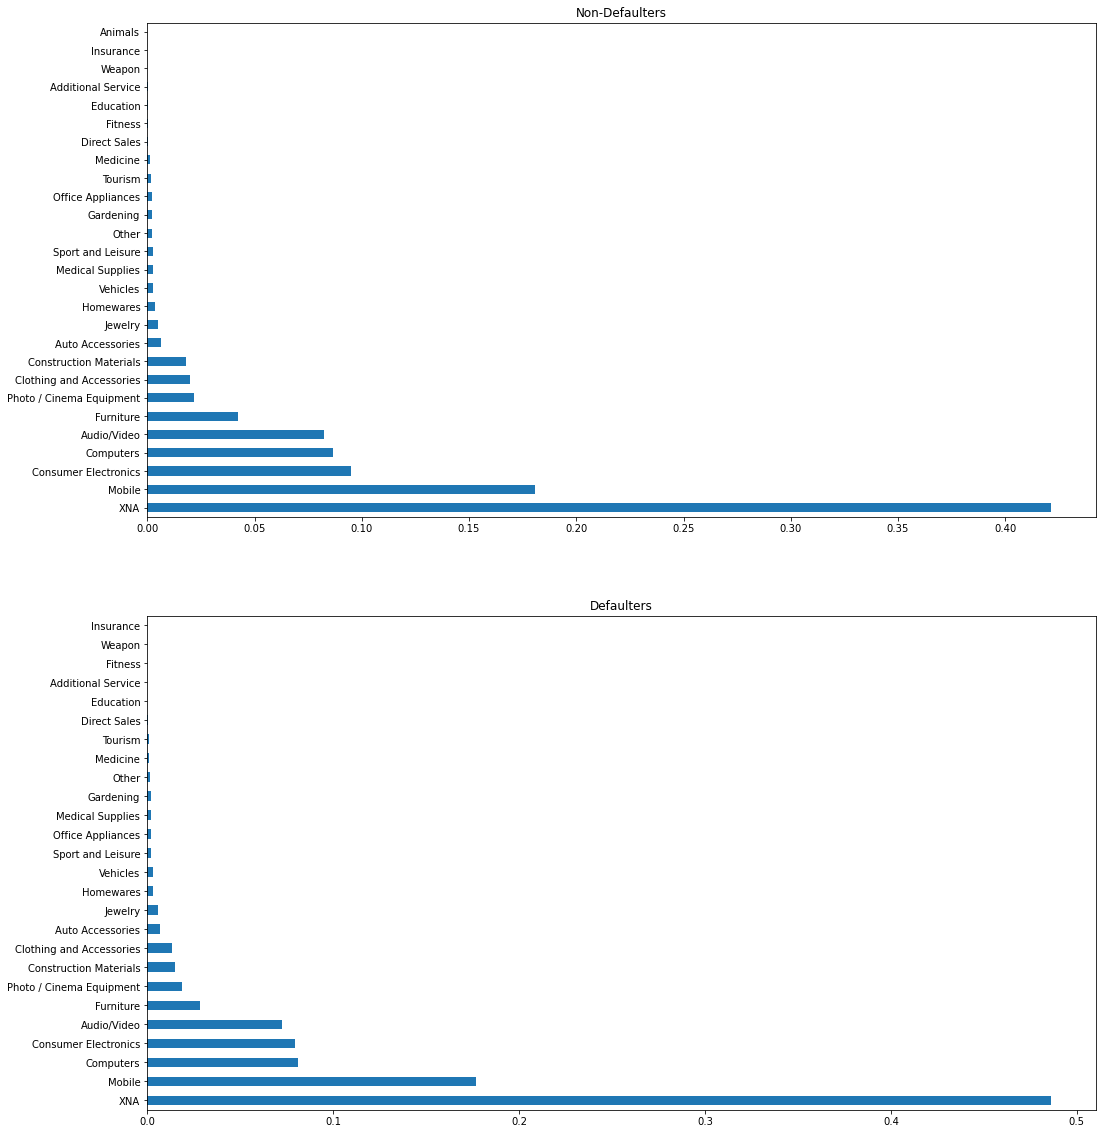

In [135]:
# Plotting barchart for "NAME_GOODS_CATEGORY" for defaulters and non-defaulters:
fig, ax = plt.subplots(2,1)
ndf_0.NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.barh(ax=ax[0]).set_title("Non-Defaulters")
ndf_1.NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.barh(ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(17,20)
plt.show()

- Mobile and consumer electronics are the goods for which loan is applied.

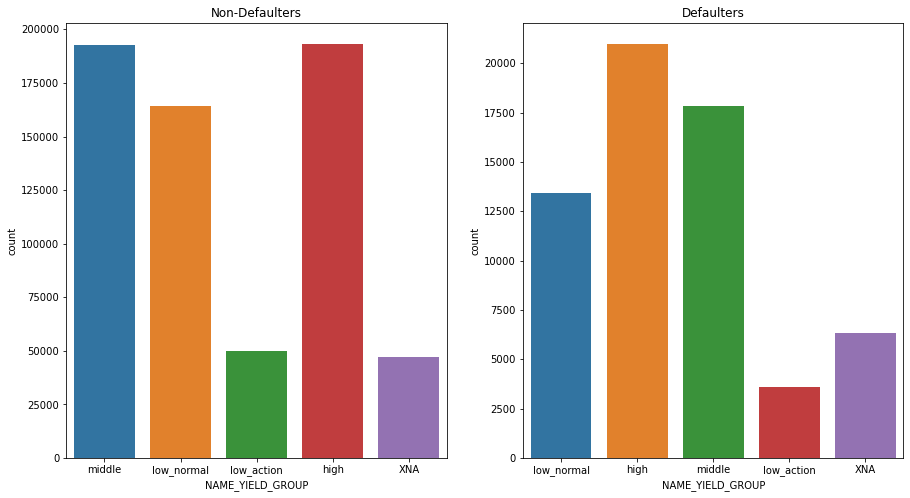

In [136]:
# Plotting countplot for "NAME_YIELD_GROUP" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_YIELD_GROUP", data=ndf_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="NAME_YIELD_GROUP", data=ndf_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,8)

plt.show()

- Interest Rate is mostly high and middle.
- Unknown interest rate more likely to default.

#### NUMERICAL VARIABLE:

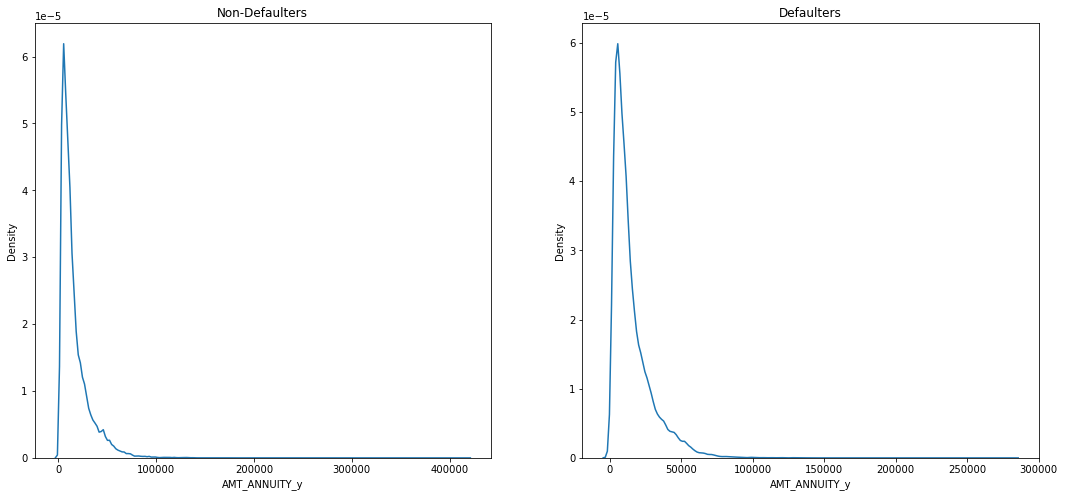

In [137]:
# Plotting distplot for "AMT_ANNUITY_y" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(ndf_0.AMT_ANNUITY_y, bins=10, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(ndf_1.AMT_ANNUITY_y, bins=10, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(18,8)

plt.show()

- Most of the applicants have been approved with lower annuity amount.

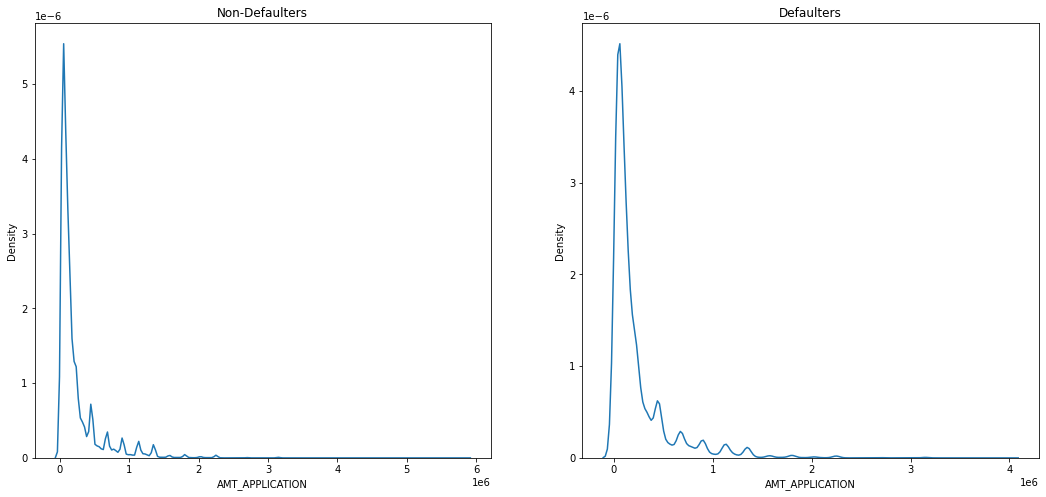

In [138]:
# Plotting distplot for "AMT_APPLICATION" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(ndf_0.AMT_APPLICATION, bins=12, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(ndf_1.AMT_APPLICATION, bins=12, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(18,8)

plt.show()

- Most of the applicants applied for lower amount of credit.

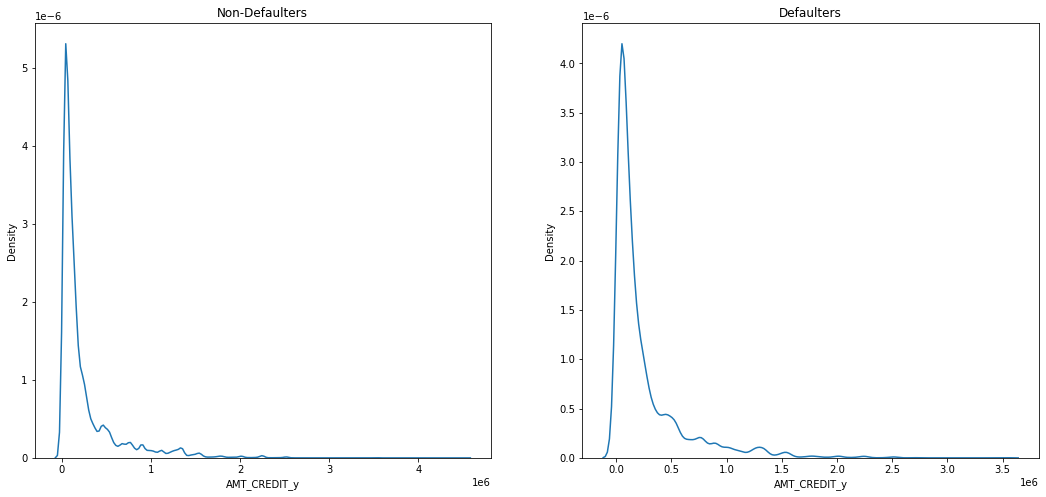

In [139]:
# Plotting distplot for "AMT_CREDIT_y" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(ndf_0.AMT_CREDIT_y, bins=10, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(ndf_1.AMT_CREDIT_y, bins=10, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(18,8)

plt.show()

- Most of the applicants have been credited with lower amount of credit.

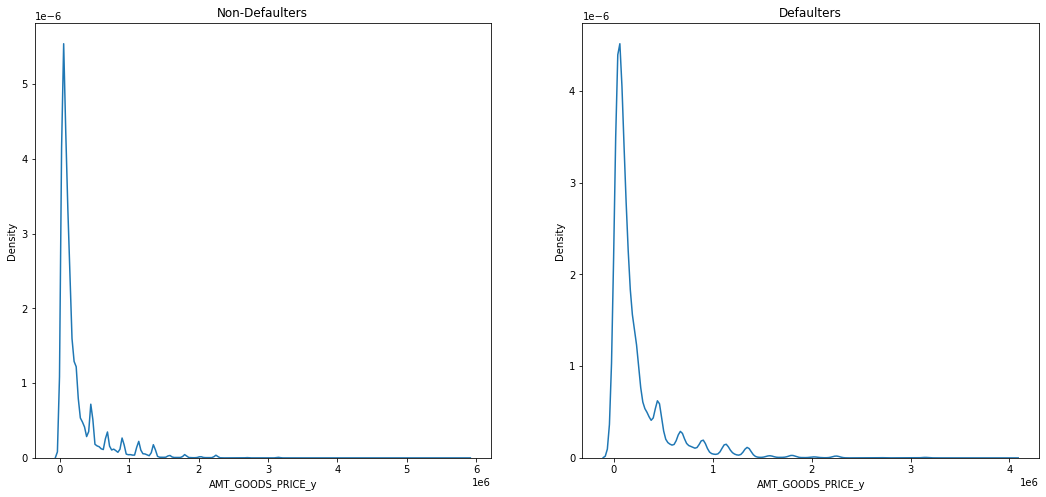

In [140]:
# Plotting distplot for "AMT_GOODS_PRICE_y" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.distplot(ndf_0.AMT_GOODS_PRICE_y, bins=8, kde=True, ax=ax[0], hist=False).set_title("Non-Defaulters")
sns.distplot(ndf_1.AMT_GOODS_PRICE_y, bins=8, kde=True, ax=ax[1], hist=False).set_title("Defaulters")

fig.set_size_inches(18,8)

plt.show()

- Most goods price are lower than 1 lakh.

#### CORRELATION MATRIX OF DEFAULTERS AND NON-DEFAULTERS:

In [141]:
# First we will create correlation matrix of numerical varibles of "TARGET" Variable:
nd0= ndf_0.iloc[0:,2:].corr(method="spearman")
nd1= ndf_1.iloc[0:,2:].corr(method="spearman")

In [142]:
nd0 #fetching correlation matrix of non-defaulters group.

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
CNT_CHILDREN            1.000000         -0.027817     -0.025068   
AMT_INCOME_TOTAL       -0.027817          1.000000      0.376448   
AMT_CREDIT_x           -0.025068          0.376448      1.000000   
AMT_ANNUITY_x          -0.007523          0.454241      0.822279   
AMT_GOODS_PRICE_x      -0.027552          0.377969      0.984609   
EXT_SOURCE_2           -0.031551          0.159662      0.119238   
EXT_SOURCE_3           -0.013356         -0.082118      0.038853   
AGE                    -0.322561          0.048768      0.148428   
YEARS_EMPLOYED         -0.050034          0.046810      0.089381   
YEARS_REGISTRATION     -0.164001         -0.039197      0.014955   
YEARS_ID_PUBLISH        0.113471          0.015910      0.015072   
AMT_ANNUITY_y          -0.069046          0.228027      0.124615   
AMT_APPLICATION        -0.079027          0.203754      0.110842   
AMT_CREDIT_y           -0.080111          0.193165      0.101580   
AMT_GOODS_PRICE_y      -0.078998          0.203731      0.110844   

                    AMT_ANNUITY_x  AMT_GOODS_PRICE_x  EXT_SOURCE_2  \
CNT_CHILDREN            -0.007523          -0.027552     -0.031551   
AMT_INCOME_TOTAL         0.454241           0.377969      0.159662   
AMT_CREDIT_x             0.822279           0.984609      0.119238   
AMT_ANNUITY_x            1.000000           0.818274      0.110345   
AMT_GOODS_PRICE_x        0.818274           1.000000      0.126198   
EXT_SOURCE_2             0.110345           0.126198      1.000000   
EXT_SOURCE_3             0.020256           0.043836      0.091136   
AGE                      0.075547           0.146429      0.138832   
YEARS_EMPLOYED           0.057701           0.093834      0.088481   
YEARS_REGISTRATION      -0.017114           0.013408      0.076266   
YEARS_ID_PUBLISH         0.005296           0.016448      0.046127   
AMT_ANNUITY_y            0.169854           0.124081      0.074840   
AMT_APPLICATION          0.135747           0.109343      0.065979   
AMT_CREDIT_y             0.124757           0.099057      0.058817   
AMT_GOODS_PRICE_y        0.135757           0.109340      0.065939   

                    EXT_SOURCE_3       AGE  YEARS_EMPLOYED  \
CNT_CHILDREN           -0.013356 -0.322561       -0.050034   
AMT_INCOME_TOTAL       -0.082118  0.048768        0.046810   
AMT_CREDIT_x            0.038853  0.148428        0.089381   
AMT_ANNUITY_x           0.020256  0.075547        0.057701   
AMT_GOODS_PRICE_x       0.043836  0.146429        0.093834   
EXT_SOURCE_2            0.091136  0.138832        0.088481   
EXT_SOURCE_3            1.000000  0.149213        0.114659   
AGE                     0.149213  1.000000        0.289284   
YEARS_EMPLOYED          0.114659  0.289284        1.000000   
YEARS_REGISTRATION      0.087161  0.270904        0.128183   
YEARS_ID_PUBLISH        0.093591  0.034909        0.082042   
AMT_ANNUITY_y          -0.015466  0.131331        0.051307   
AMT_APPLICATION        -0.032836  0.144958        0.047774   
AMT_CREDIT_y           -0.039777  0.143923        0.045217   
AMT_GOODS_PRICE_y      -0.032857  0.144960        0.047782   

                    YEARS_REGISTRATION  YEARS_ID_PUBLISH  AMT_ANNUITY_y  \
CNT_CHILDREN                 -0.164001          0.113471      -0.069046   
AMT_INCOME_TOTAL             -0.039197          0.015910       0.228027   
AMT_CREDIT_x                  0.014955          0.015072       0.124615   
AMT_ANNUITY_x                -0.017114          0.005296       0.169854   
AMT_GOODS_PRICE_x             0.013408          0.016448       0.124081   
EXT_SOURCE_2                  0.076266          0.046127       0.074840   
EXT_SOURCE_3                  0.087161          0.093591      -0.015466   
AGE                           0.270904          0.034909       0.131331   
YEARS_EMPLOYED                0.128183          0.082042       0.051307   
YEARS_REGISTRATION            1.000000          0.029275       0.02

In [143]:
nd1 #fetching correlation matrix of defaulters group.

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
CNT_CHILDREN            1.000000         -0.052166     -0.009073   
AMT_INCOME_TOTAL       -0.052166          1.000000      0.328661   
AMT_CREDIT_x           -0.009073          0.328661      1.000000   
AMT_ANNUITY_x           0.015389          0.396853      0.807853   
AMT_GOODS_PRICE_x      -0.015045          0.331111      0.976009   
EXT_SOURCE_2           -0.023057          0.139053      0.103890   
EXT_SOURCE_3           -0.014849         -0.058486      0.089509   
AGE                    -0.231510          0.114189      0.177973   
YEARS_EMPLOYED         -0.021762          0.034311      0.093318   
YEARS_REGISTRATION     -0.119230         -0.006345      0.020832   
YEARS_ID_PUBLISH        0.088985          0.031178      0.036893   
AMT_ANNUITY_y          -0.050634          0.205406      0.105022   
AMT_APPLICATION        -0.056972          0.181631      0.089311   
AMT_CREDIT_y           -0.056866          0.172245      0.081368   
AMT_GOODS_PRICE_y      -0.057016          0.181815      0.089190   

                    AMT_ANNUITY_x  AMT_GOODS_PRICE_x  EXT_SOURCE_2  \
CNT_CHILDREN             0.015389          -0.015045     -0.023057   
AMT_INCOME_TOTAL         0.396853           0.331111      0.139053   
AMT_CREDIT_x             0.807853           0.976009      0.103890   
AMT_ANNUITY_x            1.000000           0.800461      0.092823   
AMT_GOODS_PRICE_x        0.800461           1.000000      0.113333   
EXT_SOURCE_2             0.092823           0.113333      1.000000   
EXT_SOURCE_3             0.047097           0.094391      0.086419   
AGE                      0.078771           0.172644      0.149779   
YEARS_EMPLOYED           0.048887           0.103219      0.096283   
YEARS_REGISTRATION      -0.028318           0.020894      0.073304   
YEARS_ID_PUBLISH         0.020295           0.039388      0.053209   
AMT_ANNUITY_y            0.129331           0.106492      0.064764   
AMT_APPLICATION          0.098018           0.089799      0.061792   
AMT_CREDIT_y             0.089051           0.080890      0.056755   
AMT_GOODS_PRICE_y        0.097852           0.089660      0.062004   

                    EXT_SOURCE_3       AGE  YEARS_EMPLOYED  \
CNT_CHILDREN           -0.014849 -0.231510       -0.021762   
AMT_INCOME_TOTAL       -0.058486  0.114189        0.034311   
AMT_CREDIT_x            0.089509  0.177973        0.093318   
AMT_ANNUITY_x           0.047097  0.078771        0.048887   
AMT_GOODS_PRICE_x       0.094391  0.172644        0.103219   
EXT_SOURCE_2            0.086419  0.149779        0.096283   
EXT_SOURCE_3            1.000000  0.125714        0.077586   
AGE                     0.125714  1.000000        0.255200   
YEARS_EMPLOYED          0.077586  0.255200        1.000000   
YEARS_REGISTRATION      0.055982  0.186744        0.097611   
YEARS_ID_PUBLISH        0.093882  0.091892        0.085973   
AMT_ANNUITY_y          -0.012952  0.153450        0.066214   
AMT_APPLICATION        -0.036058  0.169340        0.064357   
AMT_CREDIT_y           -0.040695  0.169327        0.063242   
AMT_GOODS_PRICE_y      -0.036130  0.169385        0.064349   

                    YEARS_REGISTRATION  YEARS_ID_PUBLISH  AMT_ANNUITY_y  \
CNT_CHILDREN                 -0.119230          0.088985      -0.050634   
AMT_INCOME_TOTAL             -0.006345          0.031178       0.205406   
AMT_CREDIT_x                  0.020832          0.036893       0.105022   
AMT_ANNUITY_x                -0.028318          0.020295       0.129331   
AMT_GOODS_PRICE_x             0.020894          0.039388       0.106492   
EXT_SOURCE_2                  0.073304          0.053209       0.064764   
EXT_SOURCE_3                  0.055982          0.093882      -0.012952   
AGE                           0.186744          0.091892       0.153450   
YEARS_EMPLOYED                0.097611          0.085973       0.066214   
YEARS_REGISTRATION            1.000000          0.064151       0.00

In [144]:
# Now we will define a function to create heatmap of the above correlation of "TARGET" variable to have better understanding:
def corre(data, title):
    plt.figure(figsize=[15,10])
    sns.heatmap(data, cmap="coolwarm", annot=True)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

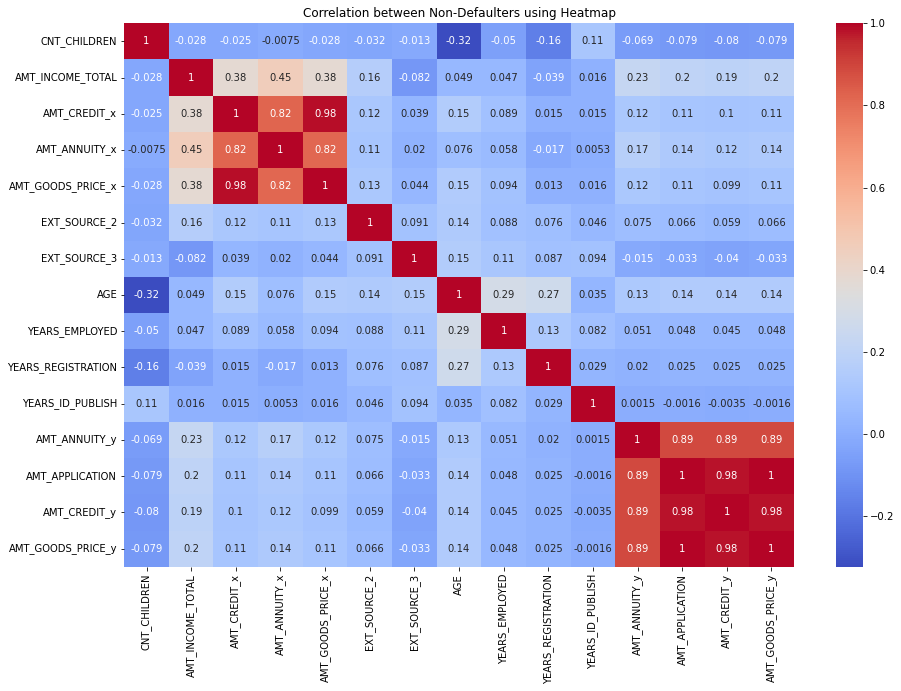

In [145]:
corre(nd0, title="Correlation between Non-Defaulters using Heatmap")

#### CORRELATION INSIGHTS OF NON-DEFAULTERS DATAFRAME:
- AMT_GOODS_PRICE_y and AMT_APPLICATION are highly and positively correlated which is equal to 1.
- AMT_GOODS_PRICE_y and AMT_CREDIT_y are also highly and positively correlated which is equal to 0.99.
- AMT_APPLICATION and AMT_CREDIT_y are also highly and positively correlated which is equal to 0.99.
- AMT_ANNUITY_y and (AMT_APPLICATION, AMT_CREDIT_y, AMT_GOODS_PRICE_y) has positive correlation.
- EXT_SOURCE_3 and (AMT_APPLICATION, AMT_CREDIT_y, AMT_GOODS_PRICE_y, AMT_ANNUITY_y) has negative correlation.
- AMT_CREDIT_x and AMT_GOODS_PRICE_x has positive correlation.
- AMT_CREDIT_x and AMT_ANNUITY_x has positive correlation.
- AMT_ANNUITY_x and AMT_GOODS_PRICE_x has positive correlation.
- AMT_INCOME_TOTAL and (AMT_ANNUITY_x, AMT_CREDIT_x, AMT_GOODS_PRICE_x) has positive correlation.
- AMT_INCOME_TOTAL and EXT_SOURCE_3 has negative correlation.
- YEARS_REGISTRATION and AMT_ANNUITY_x has negative correlation.

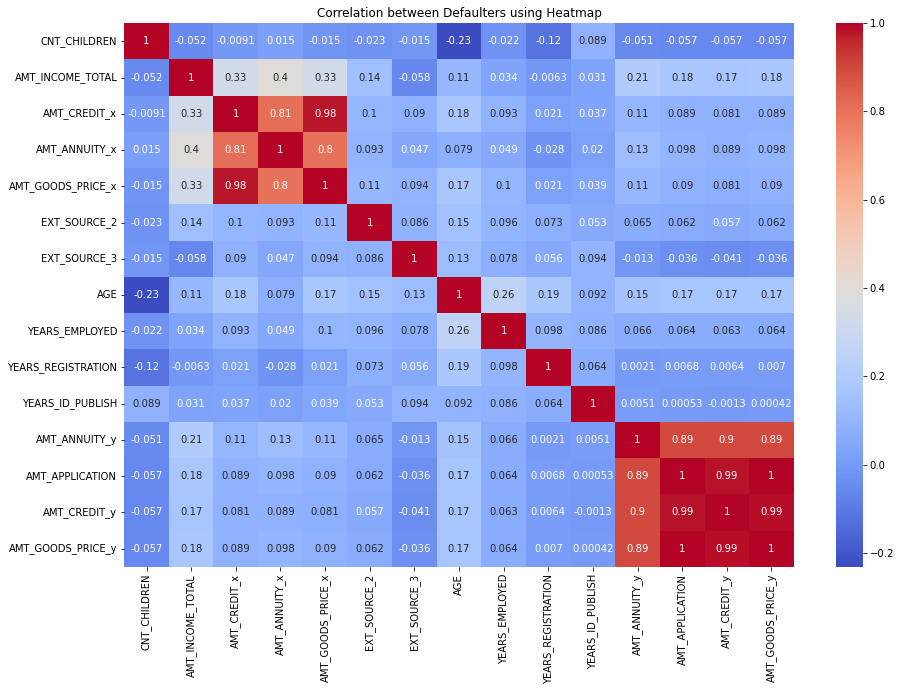

In [146]:
corre(nd1, "Correlation between Defaulters using Heatmap")

#### CORRELATION INSIGHTS OF DEFAULTERS DATAFRAME:
- AMT_GOODS_PRICE_y and AMT_APPLICATION are highly and positively correlated which is equal to 1.
- AMT_GOODS_PRICE_y and AMT_CREDIT_y are also highly and positively correlated which is equal to 0.99.
- AMT_APPLICATION and AMT_CREDIT_y are also highly and positively correlated which is equal to 0.99.
- AMT_ANNUITY_y and (AMT_APPLICATION, AMT_CREDIT_y, AMT_GOODS_PRICE_y) has positive correlation.
- EXT_SOURCE_3 and (AMT_APPLICATION, AMT_CREDIT_y, AMT_GOODS_PRICE_y, AMT_ANNUITY_y) has negative correlation.
- AMT_CREDIT_x and AMT_GOODS_PRICE_x has positive correlation.
- AMT_CREDIT_x and AMT_ANNUITY_x has positive correlation.
- AMT_ANNUITY_x and AMT_GOODS_PRICE_x has positive correlation.
- AMT_INCOME_TOTAL and (AMT_ANNUITY_x, AMT_CREDIT_x, AMT_GOODS_PRICE_x) has positive correlation.
- AMT_INCOME_TOTAL and EXT_SOURCE_3 has negative correlation.
- YEARS_REGISTRATION and AMT_ANNUITY_x has negative correlation.

### BIVARIATE/MULTIVARIATE ANALYSIS:

#### CATEGORICAL-CATEGORICAL ANALYSIS:

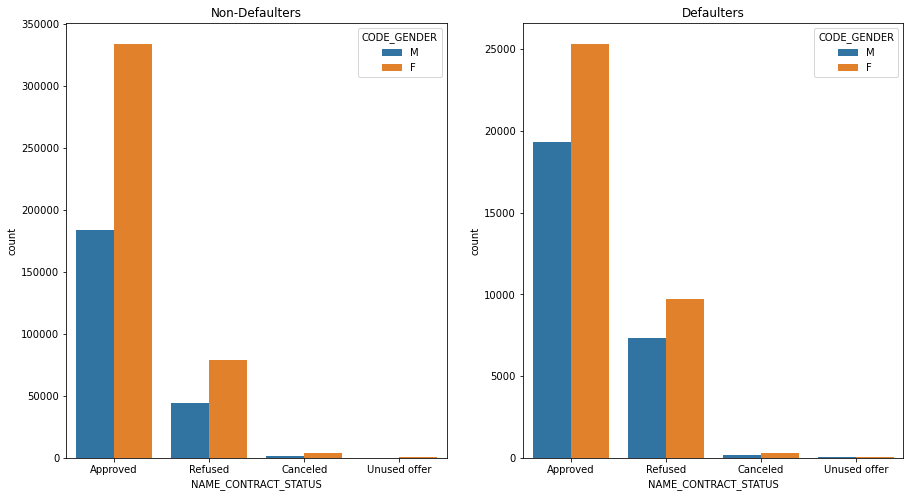

In [147]:
# Plotting countplot for "NAME_CONTRACT_STATUS" vs "CODE_GENDER" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_CONTRACT_STATUS", hue="CODE_GENDER", data=ndf_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="NAME_CONTRACT_STATUS", hue="CODE_GENDER", data=ndf_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,8)

plt.show()

- Defaulters had higher proportion of those whose previous loan application were rejected.
- There are higher proportion of male defaulters whose previous loan application were approved.
- Males refused rate is higher than females.

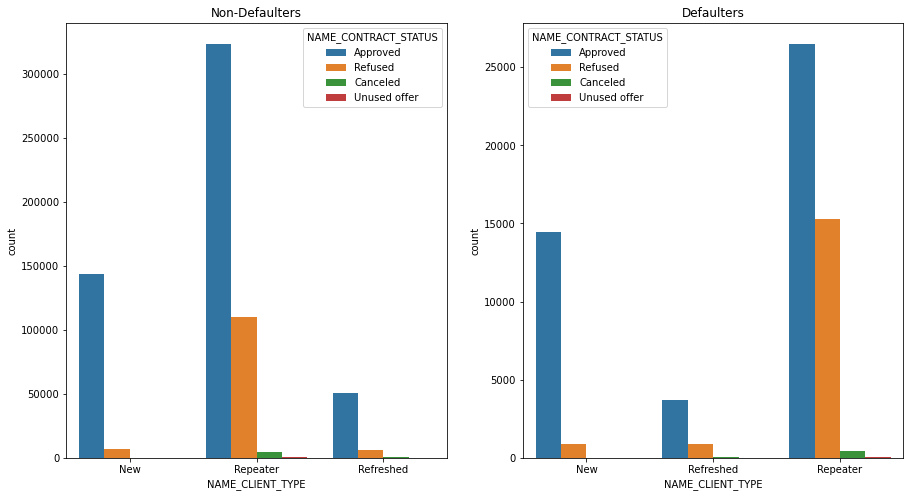

In [148]:
# Plotting countplot for "NAME_CLIENT_TYPE" vs "NAME_CONTRACT_STATUS" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_CLIENT_TYPE", hue="NAME_CONTRACT_STATUS", data=ndf_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="NAME_CLIENT_TYPE", hue="NAME_CONTRACT_STATUS", data=ndf_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,8)

plt.show()

- There is high ratio of those applicants whose previous loan application was rejected and who showed difficulty with loan repayments.

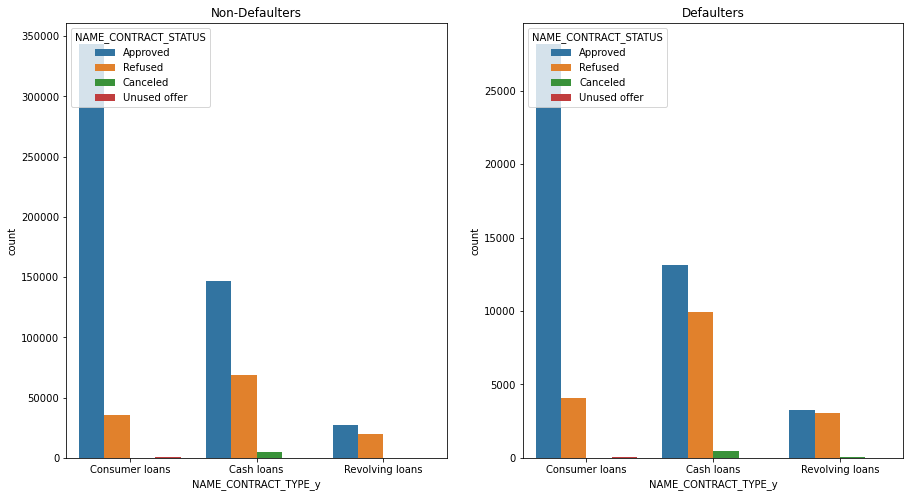

In [149]:
# Plotting countplot for "NAME_CONTRACT_TYPE_y" vs "NAME_CONTRACT_STATUS" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_CONTRACT_TYPE_y", hue="NAME_CONTRACT_STATUS", data=ndf_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="NAME_CONTRACT_TYPE_y", hue="NAME_CONTRACT_STATUS", data=ndf_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,8)

plt.show()

- Higher proportion is seen in consumer loans which has higher rate of approved loan.

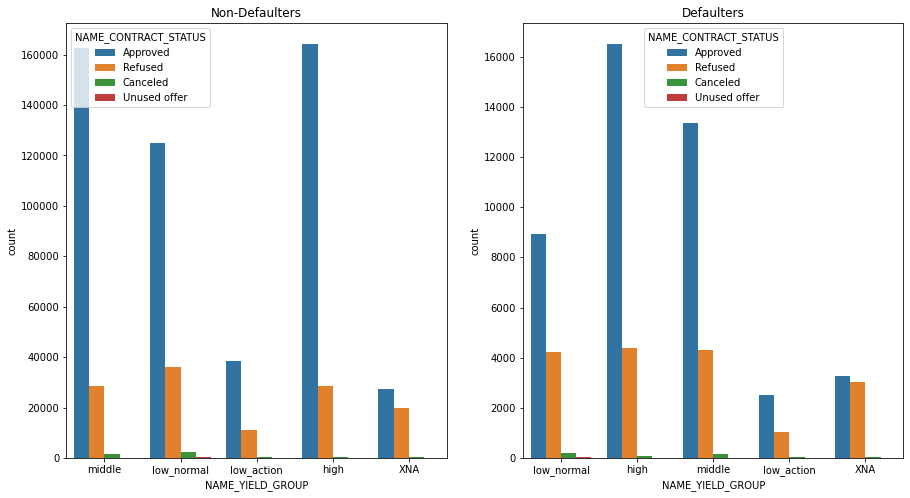

In [150]:
# Plotting countplot for "NAME_YIELD_GROUP" vs "NAME_CONTRACT_STATUS" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_YIELD_GROUP", hue="NAME_CONTRACT_STATUS", data=ndf_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="NAME_YIELD_GROUP", hue="NAME_CONTRACT_STATUS", data=ndf_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,8)

plt.show()

- Low action loan has low refusal rate.
- High yield loans have high risk of loan default.

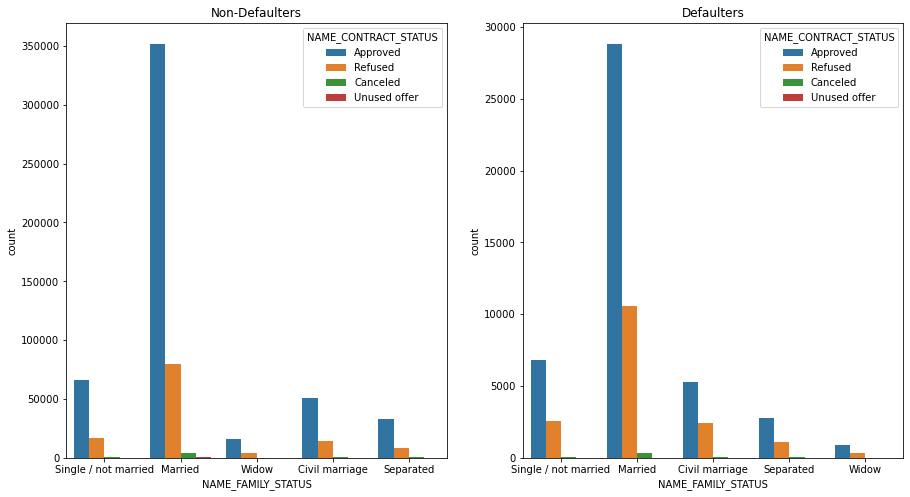

In [151]:
# Plotting countplot for "NAME_FAMILY_STATUS" vs "NAME_CONTRACT_STATUS" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_FAMILY_STATUS", hue="NAME_CONTRACT_STATUS", data=ndf_0, ax=ax[0]).set_title("Non-Defaulters")
sns.countplot(x="NAME_FAMILY_STATUS", hue="NAME_CONTRACT_STATUS", data=ndf_1, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,8)

plt.show()

- Single and Civil Marriage people have higher ratio of loan default.

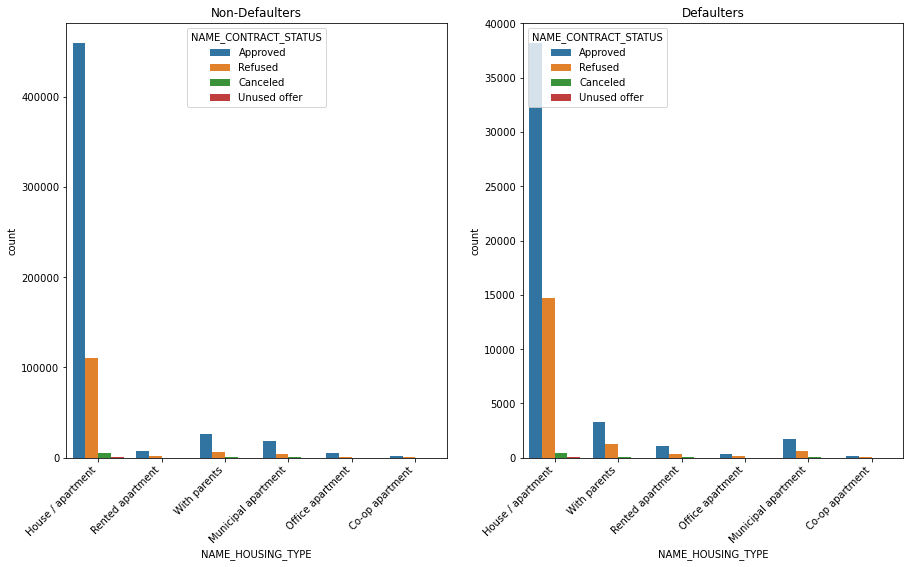

In [152]:
# Plotting countplot for "NAME_HOUSING_TYPE" vs "NAME_CONTRACT_STATUS" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.countplot(x="NAME_HOUSING_TYPE", hue="NAME_CONTRACT_STATUS", data=ndf_0, ax=ax[0]).set_title("Non-Defaulters")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment="right")

sns.countplot(x="NAME_HOUSING_TYPE", hue="NAME_CONTRACT_STATUS", data=ndf_1, ax=ax[1]).set_title("Defaulters")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment="right")

fig.set_size_inches(15,8)

plt.show()

- Defaulters have high proportion of refused previous loan application in apartment housing type.

#### NUMERICAL-CATEGORICAL ANALYSIS:

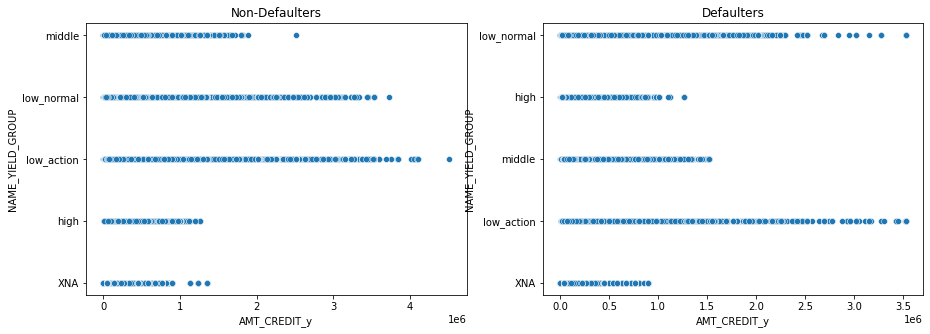

In [153]:
# Plotting scatterplot for "AMT_CREDIT_y" vs "NAME_YIELD_GROUP" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.scatterplot(ndf_0.AMT_CREDIT_y, ndf_0.NAME_YIELD_GROUP, estimator="mean", ax=ax[0]).set_title("Non-Defaulters")
sns.scatterplot(ndf_1.AMT_CREDIT_y, ndf_1.NAME_YIELD_GROUP, estimator="mean", ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- People having high interest on low credit amount faces more difficulties in loan repayment.
- Low action and low normal interest rate is provided to high credit amount which leads to more defaulters.

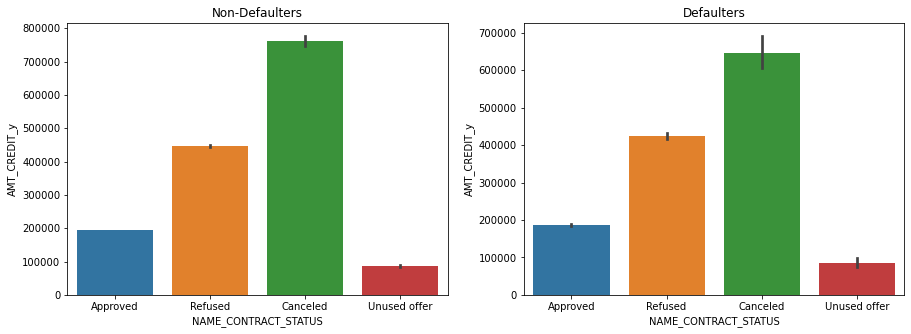

In [154]:
# Plotting barplot for "NAME_CONTRACT_STATUS" vs "AMT_CREDIT_y" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.barplot(ndf_0.NAME_CONTRACT_STATUS, ndf_0.AMT_CREDIT_y, ax=ax[0]).set_title("Non-Defaulters")
sns.barplot(ndf_1.NAME_CONTRACT_STATUS, ndf_1.AMT_CREDIT_y, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- There are high no. of cancelled loan whose credit amount is greater than 6 lakhs.

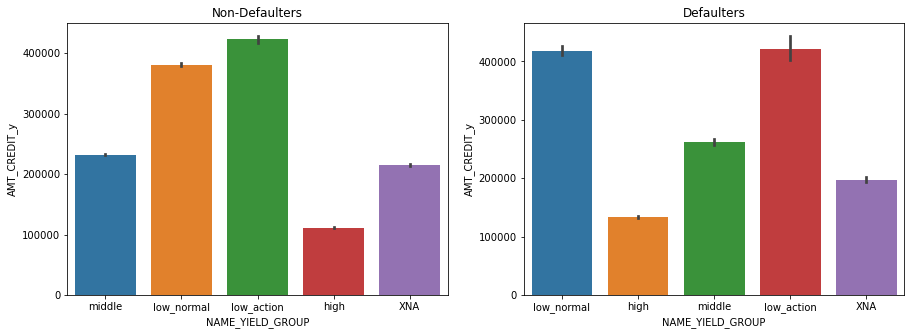

In [155]:
# Plotting barplot for "NAME_YIELD_GROUP" vs "AMT_CREDIT_y" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.barplot(ndf_0.NAME_YIELD_GROUP, ndf_0.AMT_CREDIT_y, ax=ax[0]).set_title("Non-Defaulters")
sns.barplot(ndf_1.NAME_YIELD_GROUP, ndf_1.AMT_CREDIT_y, ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Low interest have high amount credited.

#### NUMERICAL-NUMERICAL ANALYSIS:

<Figure size 1440x1440 with 0 Axes>

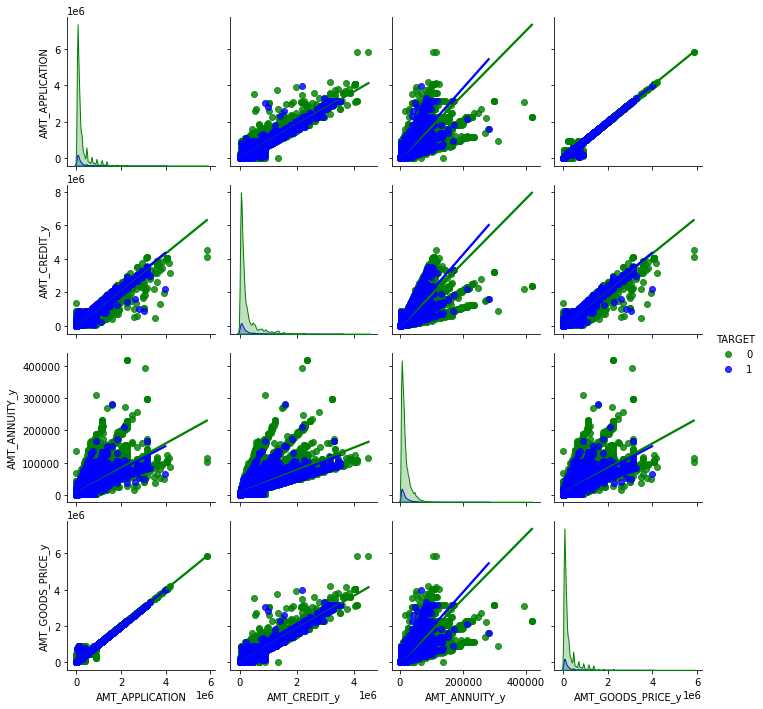

In [163]:
# Plotting pairplot for "AMT_APPLICATION", "AMT_CREDIT_y", "AMT_ANNUITY_y" and "AMT_GOODS_PRICE_y" for defaulters and non-defaulters:
data1= ndf[["AMT_APPLICATION", "AMT_CREDIT_y", "AMT_ANNUITY_y", "AMT_GOODS_PRICE_y", "TARGET"]]
plt.figure(figsize=[20,20])
sns.pairplot(data1, kind="reg", diag_kind="kde", hue="TARGET", palette=["g", "b"])

plt.show()

<Figure size 1440x1440 with 0 Axes>

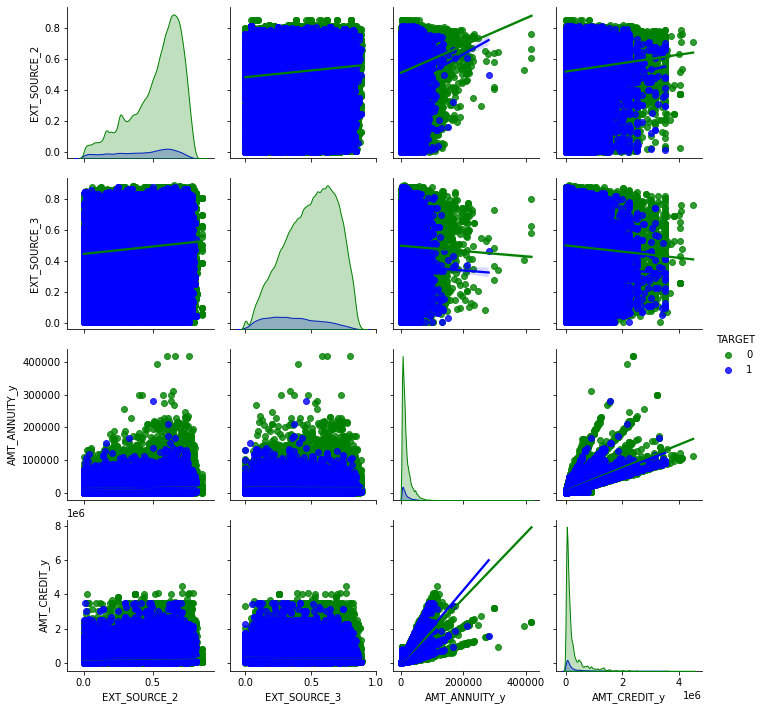

In [164]:
# Plotting pairplot for "EXT_SOURCE_2", "EXT_SOURCE_3", "AMT_ANNUITY_y" and "AMT_CREDIT_y" for defaulters and non-defaulters:
data2= ndf[["EXT_SOURCE_2", "EXT_SOURCE_3", "AMT_ANNUITY_y", "AMT_CREDIT_y", "TARGET"]]
plt.figure(figsize=[20,20])
sns.pairplot(data2, kind="reg", diag_kind="kde", hue="TARGET", palette=["g", "b"])

plt.show()

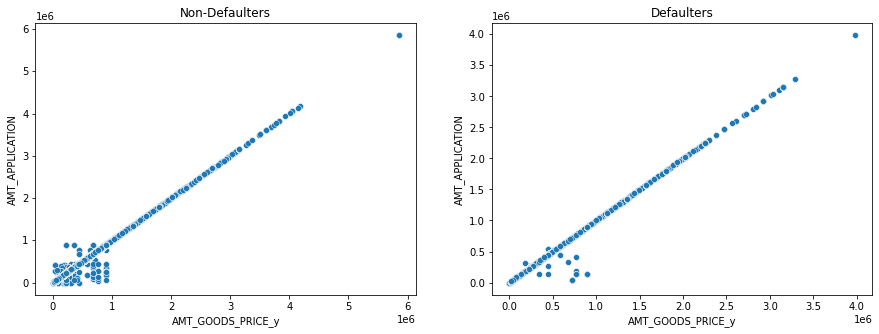

In [156]:
# Plotting scatterplot for "AMT_GOODS_PRICE_y" vs "AMT_APPLICATION" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.scatterplot(ndf_0.AMT_GOODS_PRICE_y, ndf_0.AMT_APPLICATION, estimator="mean", ax=ax[0]).set_title("Non-Defaulters")
sns.scatterplot(ndf_1.AMT_GOODS_PRICE_y, ndf_1.AMT_APPLICATION, estimator="mean", ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- When amount of goods price increases the application amount also increases.

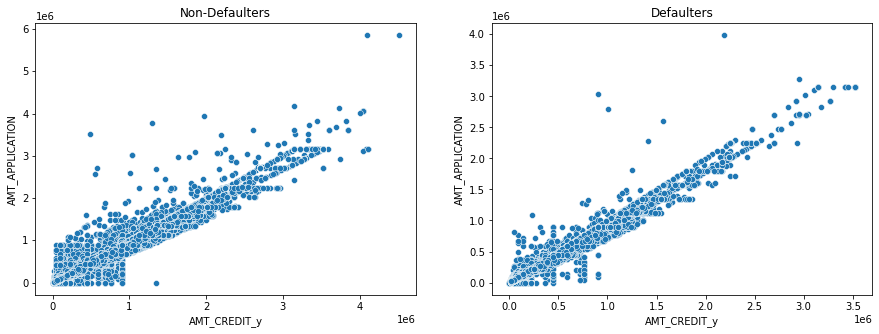

In [157]:
# Plotting scatterplot for "AMT_CREDIT_y" vs "AMT_APPLICATION" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.scatterplot(ndf_0.AMT_CREDIT_y, ndf_0.AMT_APPLICATION, estimator="mean", ax=ax[0]).set_title("Non-Defaulters")
sns.scatterplot(ndf_1.AMT_CREDIT_y, ndf_1.AMT_APPLICATION, estimator="mean", ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Increase in application amount, credit amount also increases.

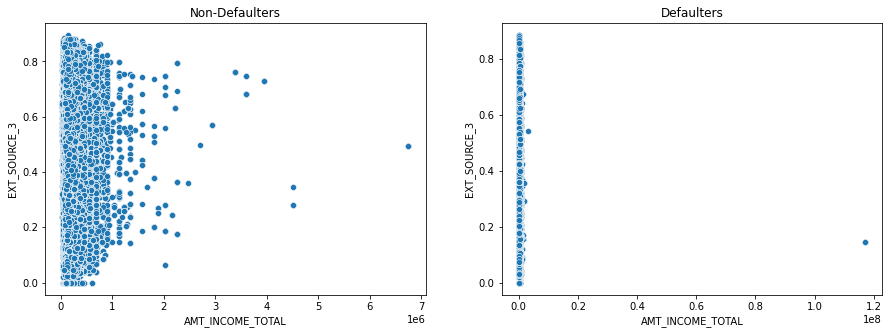

In [158]:
# Plotting scatterplot for "AMT_INCOME_TOTAL" vs "EXT_SOURCE_3" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.scatterplot(ndf_0.AMT_INCOME_TOTAL, ndf_0.EXT_SOURCE_3, estimator="mean", ax=ax[0]).set_title("Non-Defaulters")
sns.scatterplot(ndf_1.AMT_INCOME_TOTAL, ndf_1.EXT_SOURCE_3, estimator="mean", ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Low income people have increasing credit score.

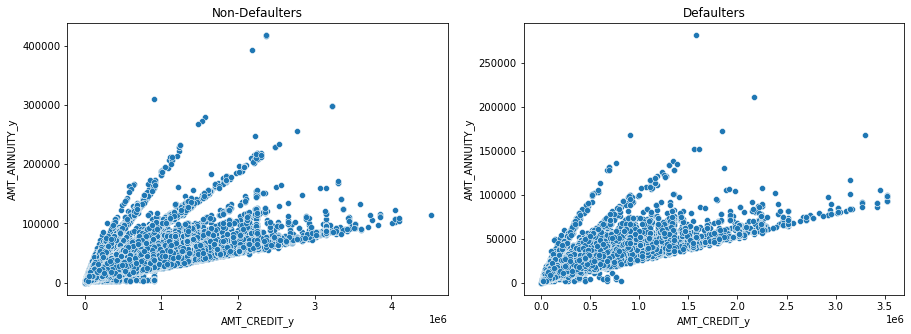

In [159]:
# Plotting scatterplot for "AMT_CREDIT_y" vs "AMT_ANNUITY_y" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.scatterplot(ndf_0.AMT_CREDIT_y, ndf_0.AMT_ANNUITY_y, estimator="mean", ax=ax[0]).set_title("Non-Defaulters")
sns.scatterplot(ndf_1.AMT_CREDIT_y, ndf_1.AMT_ANNUITY_y, estimator="mean", ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- When amount credit increases then annuity amount also increases.

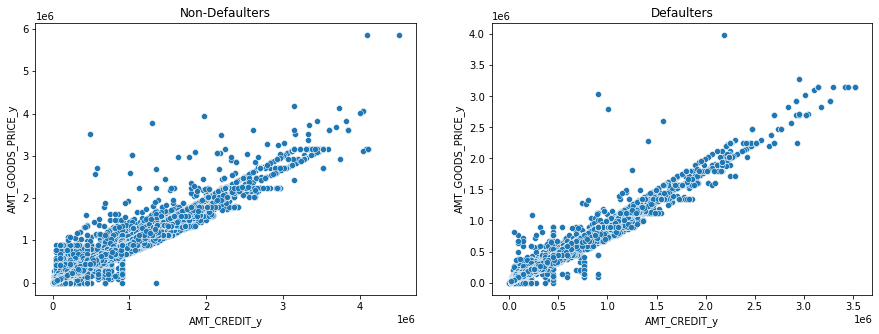

In [160]:
# Plotting scatterplot for "AMT_CREDIT_y" vs "AMT_GOODS_PRICE_y" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.scatterplot(ndf_0.AMT_CREDIT_y, ndf_0.AMT_GOODS_PRICE_y, estimator="mean", ax=ax[0]).set_title("Non-Defaulters")
sns.scatterplot(ndf_1.AMT_CREDIT_y, ndf_1.AMT_GOODS_PRICE_y, estimator="mean", ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Increase in goods price amount leads to increase in credit amount.

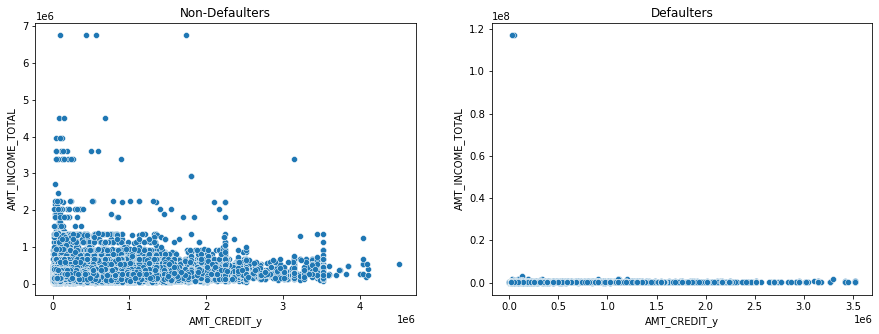

In [161]:
# Plotting scatterplot for "AMT_INCOME_TOTAL" vs "AMT_CREDIT_y" for defaulters and non-defaulters:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data=ndf_0, x="AMT_CREDIT_y", y="AMT_INCOME_TOTAL", estimator="mean", ax=ax[0]).set_title("Non-Defaulters")
sns.scatterplot(data=ndf_1, x="AMT_CREDIT_y", y="AMT_INCOME_TOTAL", estimator="mean", ax=ax[1]).set_title("Defaulters")

fig.set_size_inches(15,5)

plt.show()

- Low income group have more credit amount which leads to difficulty in loan repayments.

### OBSERVATIONS:
- Proportion of defaulters and non-defaulters are 8.8% and 91.2% respectively.
- Females are having greater ratio than males for loan applications.
- Consumer Loans are preffered more.
- People between 1-2 lakhs income avails maximum loans.
- Laborers avails highest loan and IT staff avails less loans.
- Employed range 0-5 years avails maximum no. of loan.
- Higher amount is credited for low income group.
- Non-Defaulters are having average external score more than 0.4.
- Defaulters are having external credit score less than 0.4.
- Student, Businessman and Pensioner are a safe target to be non-defaulters.
- Males are having higher ratio of default loan than females.
- Previously Refused Contract types are more likely to default on loan.
- Business Entity Type 3 and Self Employed have higher proportions of default on loan.
- Defaulters are majorly from low income group.
- Academic degree and higher education type has maximum credit score.
- Low income range group face difficulty in loan repayments.
- Single and Civil Marriage people have higher ratio of loan default.
- Academic degree are more likely to be non-defaulters.
- Refused contracts are more likely to be defaulters.
- Business Entity Type 3 and Self Employed have higher proportions of default.
- Repairs Loan type faces more difficulty in loan repayment.
- There are higher proportion of male defaulters whose previous loan application were approved.
- High yield loans have high risk of loan default.
- People having high interest on low credit amount faces more difficulties in loan repayment.
- Low interest rate is provided to high credit amount which leads to more defaulters.
- Low interest have high amount credited.

### IMPORTANT POINTS FOR RECOGNIZING LOAN DEFAULTS:
- EXTERNAL CREDIT SCORES having mean score less than 0.4.
- Low skill labourers.
- Repairs Loan.
- Males with lower secondary education.
- Employed for less than 3 years.
- Age group less than 30 having low income below 1 lakh.
- Single & Civil Marriages having lower secondary education.
- Buisness Entity Type 3 and Self Employed.
- Female waiter/Barmen staff.
- Low interest rate for high credit amount.
- Low income group getting higher credit amount.

### CONCLUSIONS:
Driver Variables behind loan default are:
- EXTERNAL CREDIT SCORE.
- FAMILY STATUS.
- INCOME.
- PREVIOUS LOAN REJECTION.
- OCCUPATION TYPE.
- EDUCATION TYPE.
<br>
<br>
Safe target for providing loan:
**Student, Businessman and Pensioner are a safe target and likely to be non-defaulters.*
**Academic degree are more likely to be non-defaulters.*